In [1]:
import pandas as pd
import numpy  as np
import requests
import matplotlib.pyplot as plt
from numpy import log
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('D:/Работа/ML_ODN/data/df_ODN.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,object_id,value,type,cons_name,inn,datetime,fias_code,address,object_name,cluster
0,780200000439760115,46,NaN,"ГУП РЭП ""ПРОГРЕСС""",NaN,2019-06-01,05c2732d-7abf-4faf-a3db-1011e5930a11,NaN,NaN,NaN
1,780200000439760115,22,NaN,"ГУП РЭП ""ПРОГРЕСС""",NaN,2019-05-01,05c2732d-7abf-4faf-a3db-1011e5930a11,NaN,NaN,NaN
2,780200000439760115,0,NaN,"ГУП РЭП ""ПРОГРЕСС""",NaN,2018-06-01,05c2732d-7abf-4faf-a3db-1011e5930a11,NaN,NaN,NaN
3,780200000439760115,1,NaN,"ГУП РЭП ""ПРОГРЕСС""",NaN,2017-05-01,05c2732d-7abf-4faf-a3db-1011e5930a11,NaN,NaN,NaN
4,780200000439760115,1,NaN,"ГУП РЭП ""ПРОГРЕСС""",NaN,2017-04-01,05c2732d-7abf-4faf-a3db-1011e5930a11,NaN,NaN,NaN


In [3]:
df = df[['object_id', 'value', 'datetime']]
df = df.sort_values(["object_id", "datetime"], ascending = (True, True)).reset_index(drop = True)
df['datetime']=pd.to_datetime(df['datetime'])
df

,object_id,value,datetime
0,471000001000260001,0,2017-09-01
1,471000001000260001,0,2018-06-01
2,471000001000260001,0,2020-05-01
3,471000001002860002,1180,2017-02-01
4,471000001002860002,1273,2017-03-01
...,...,...,...
189338,782600003200930002,23550,2021-04-01
189339,782600003200930002,10260,2021-05-01
189340,782600003200930002,11460,2021-06-01
189341,782600003211300003,19573,2021-05-01


In [4]:
unq_id = df['object_id'].unique()
unq_id = unq_id[:50]
unq_id

array([471000001000260001, 471000001002860002, 471000001002860003,
       471000001002920002, 471000001002950010, 471000001006360001,
       471000001006410098, 471000001006410099, 471000001006410100,
       471000001006410101, 471000001006410102, 471000001006410103,
       471000001006410104, 471000001006430043, 471000001006430056,
       471000001006430057, 471000001006430058, 471000001006430059,
       471000001006430061, 471000001006430062, 471000001006430063,
       471000001006430227, 471000001006430228, 471000001006430229,
       471000001006430230, 471000001006430231, 471000001006430232,
       471000001006430233, 471000001007330002, 471000001007340002,
       471000001007350002, 471000001007360002, 471000001007630001,
       471000001008560001, 471000003052100001, 471000003074020504,
       471000003074020505, 471000003074020506, 471000003074020507,
       471000003074020508, 471100001103430001, 471100001104210001,
       471200001201030001, 471200001203030001, 471200001203030

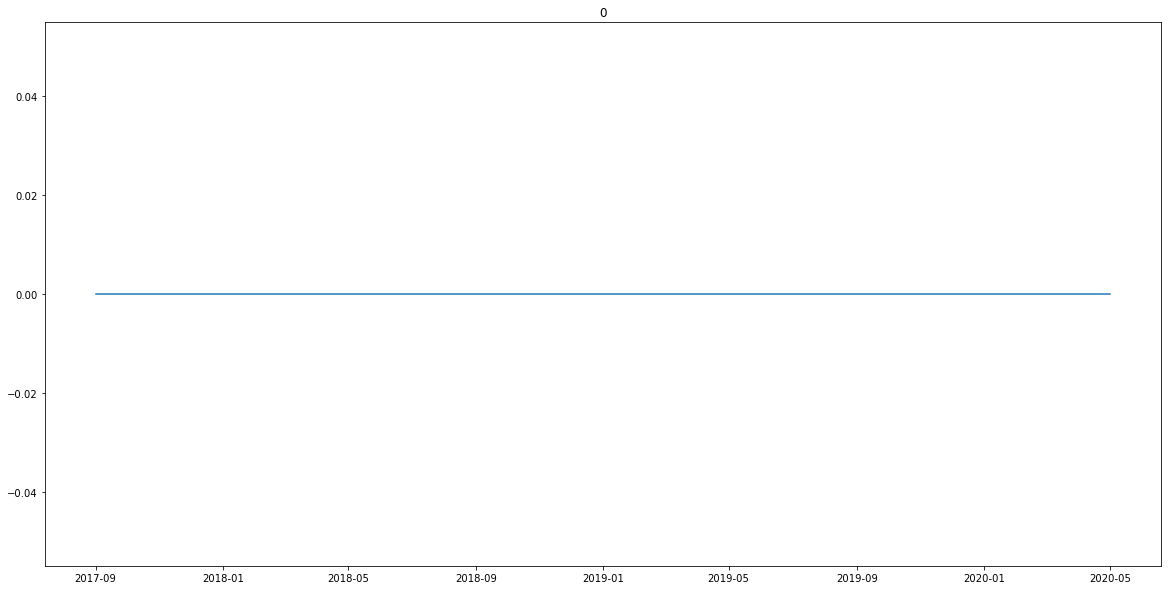

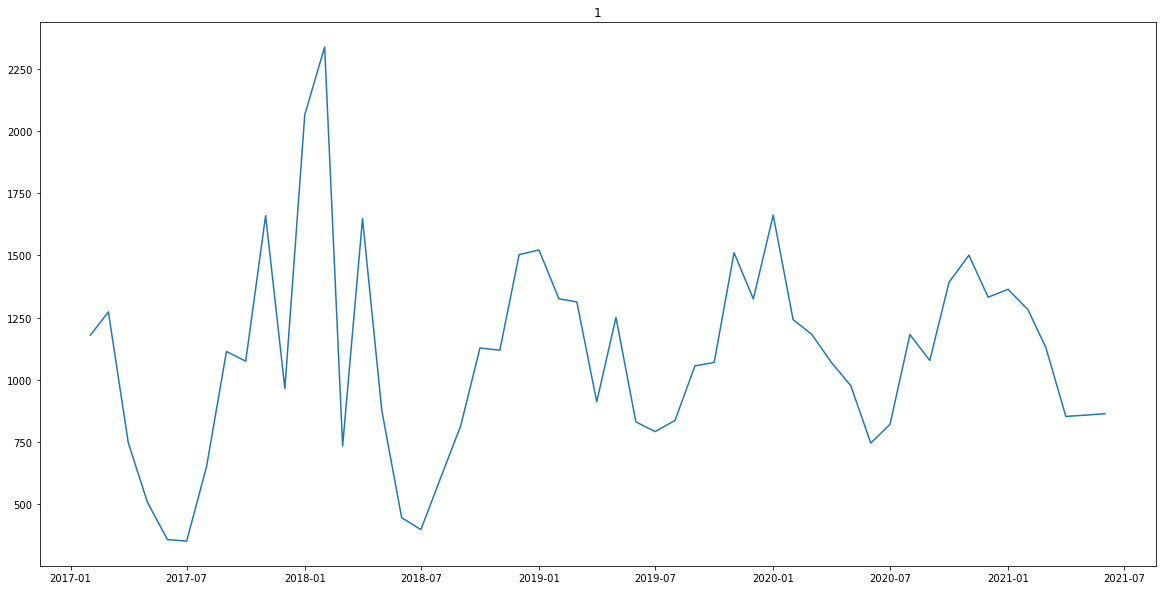

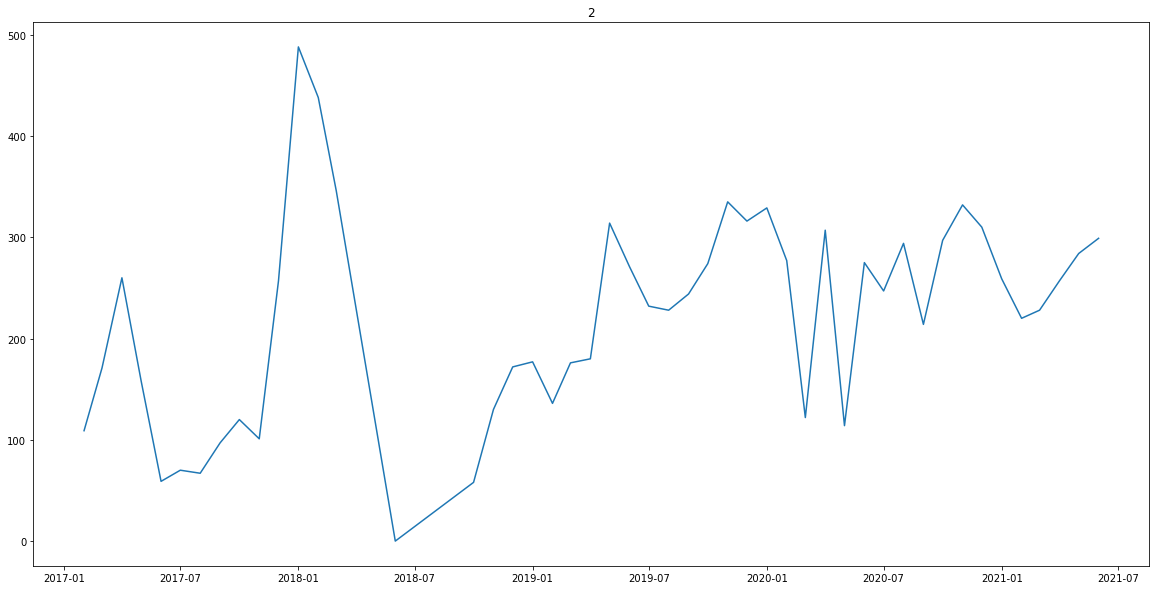

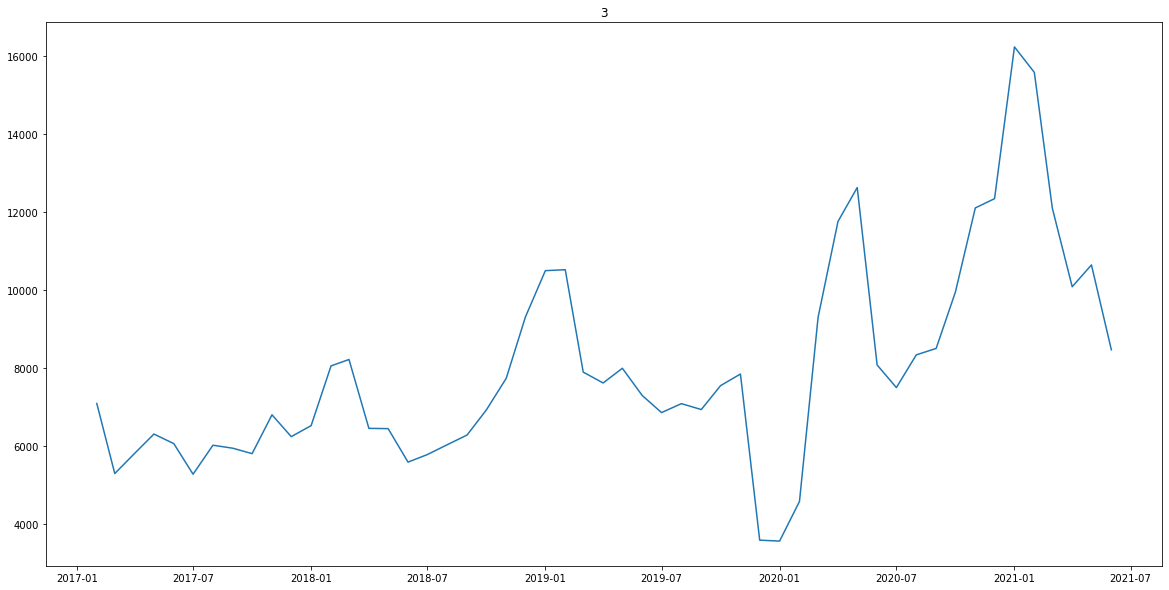

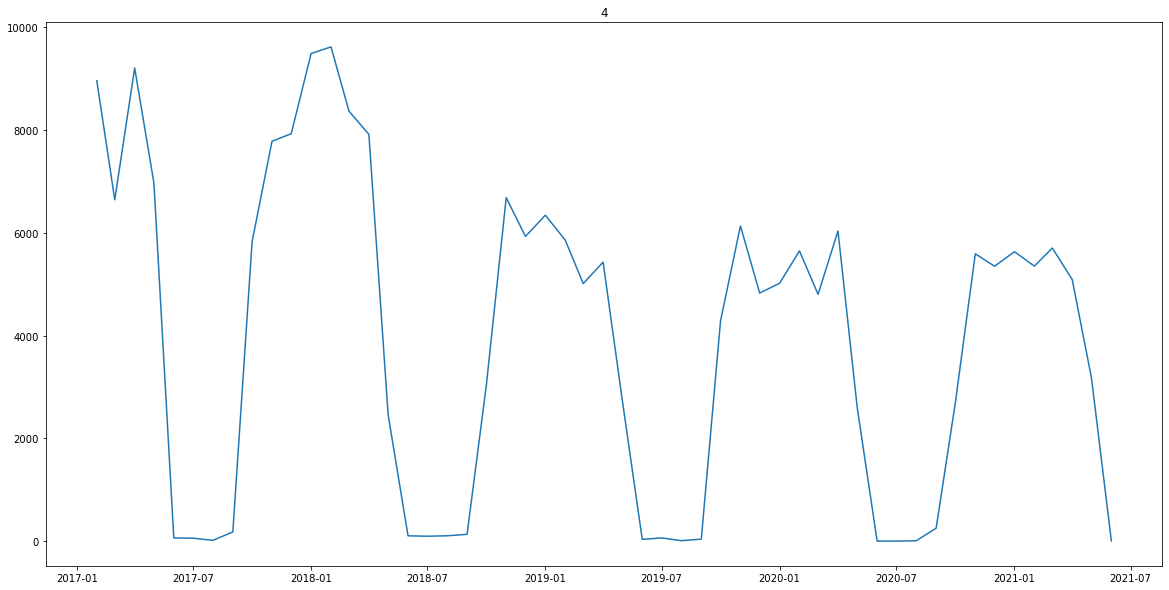

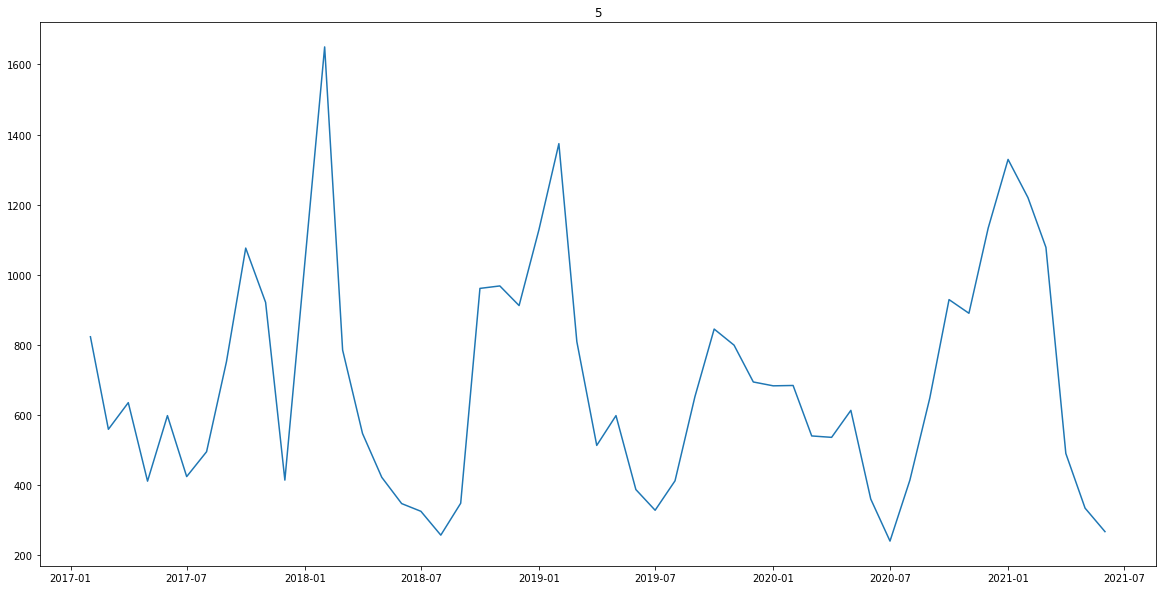

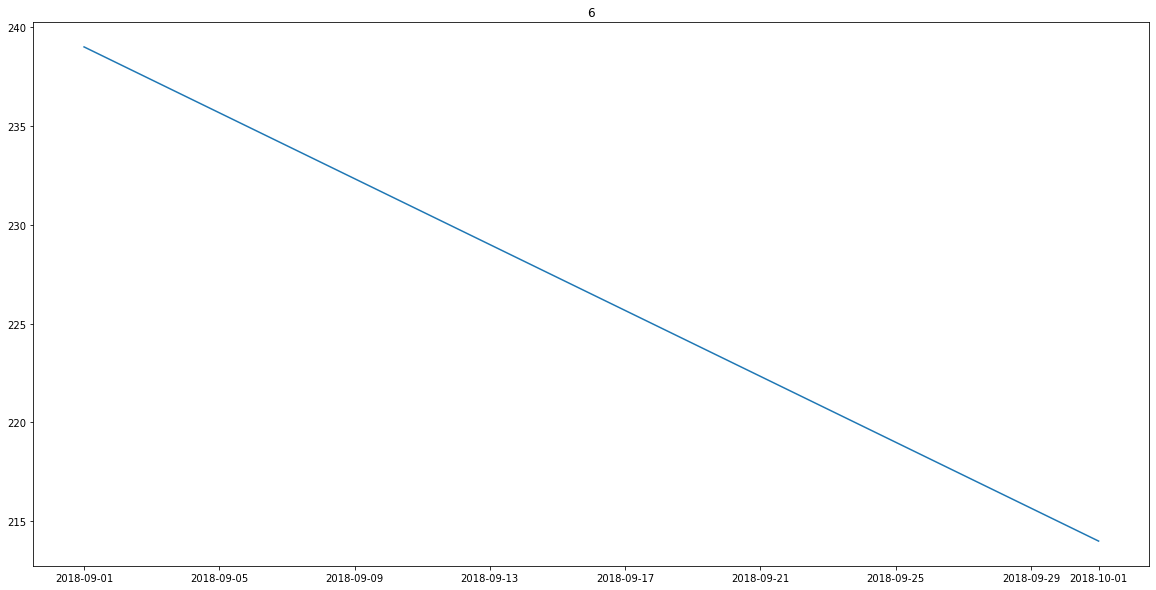

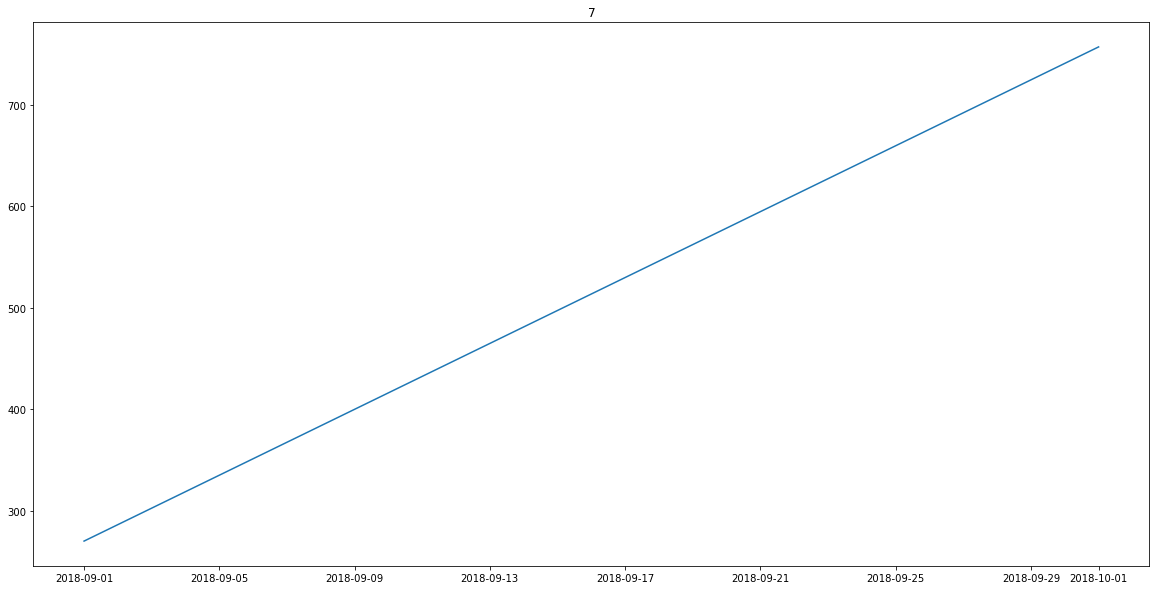

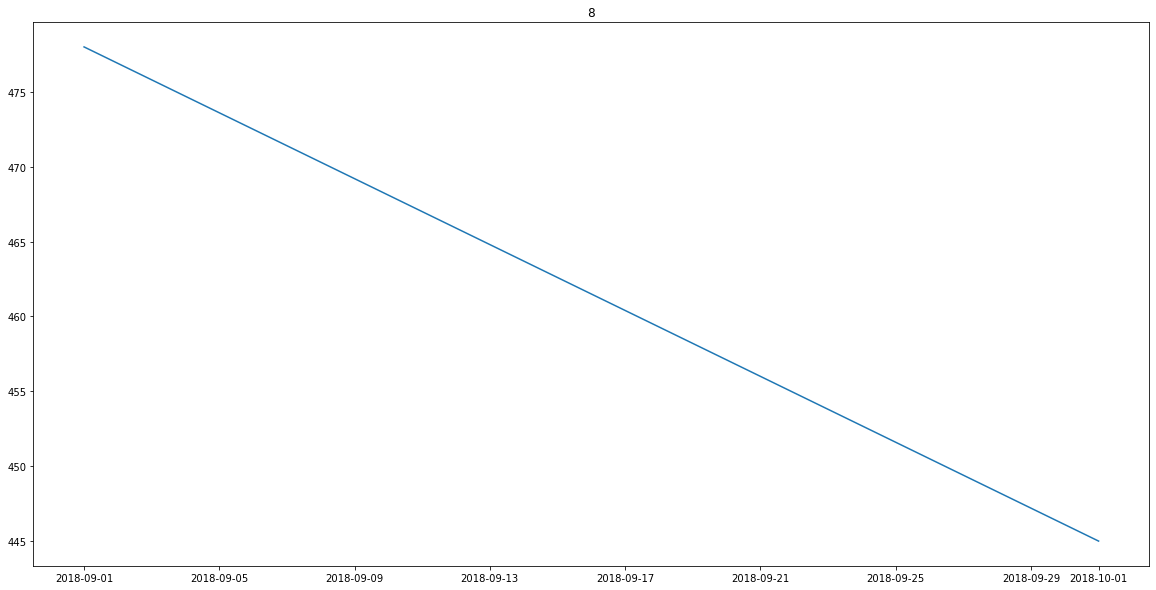

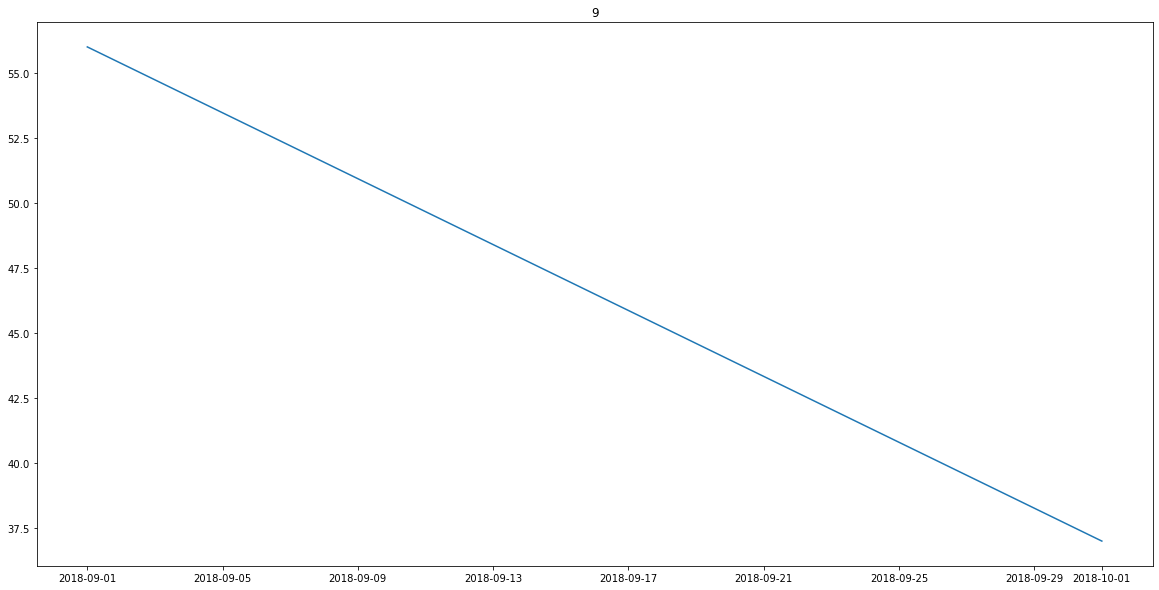

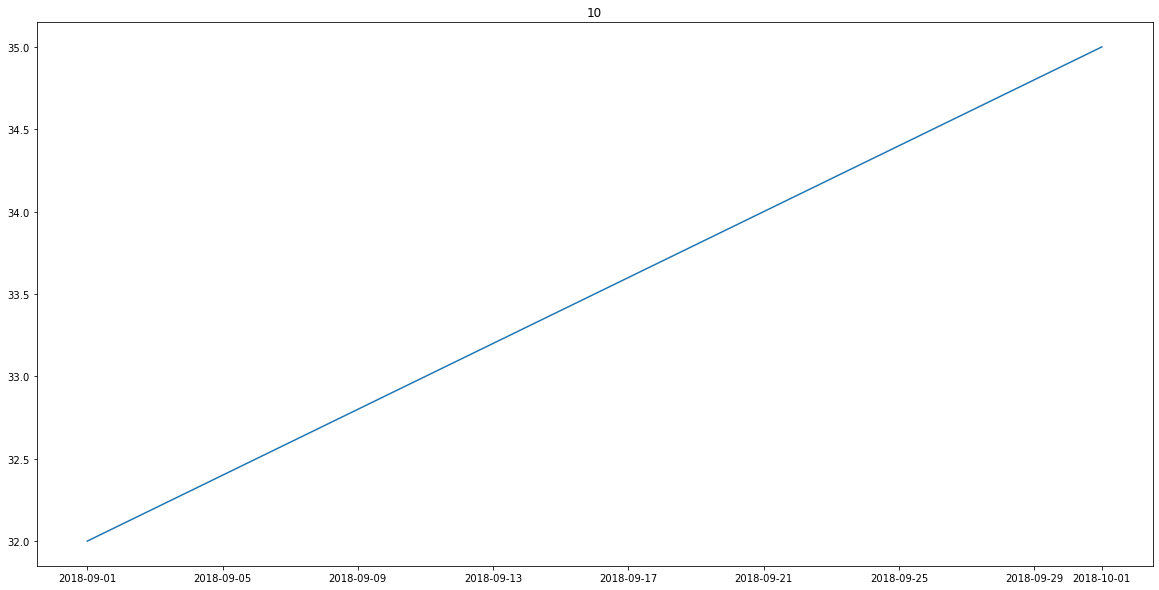

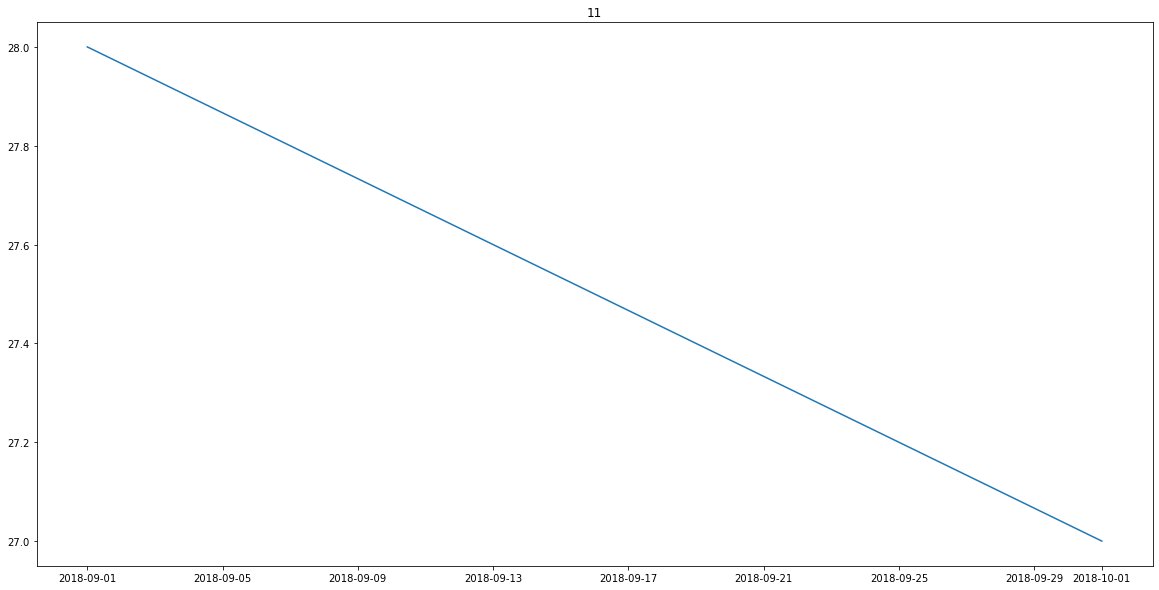

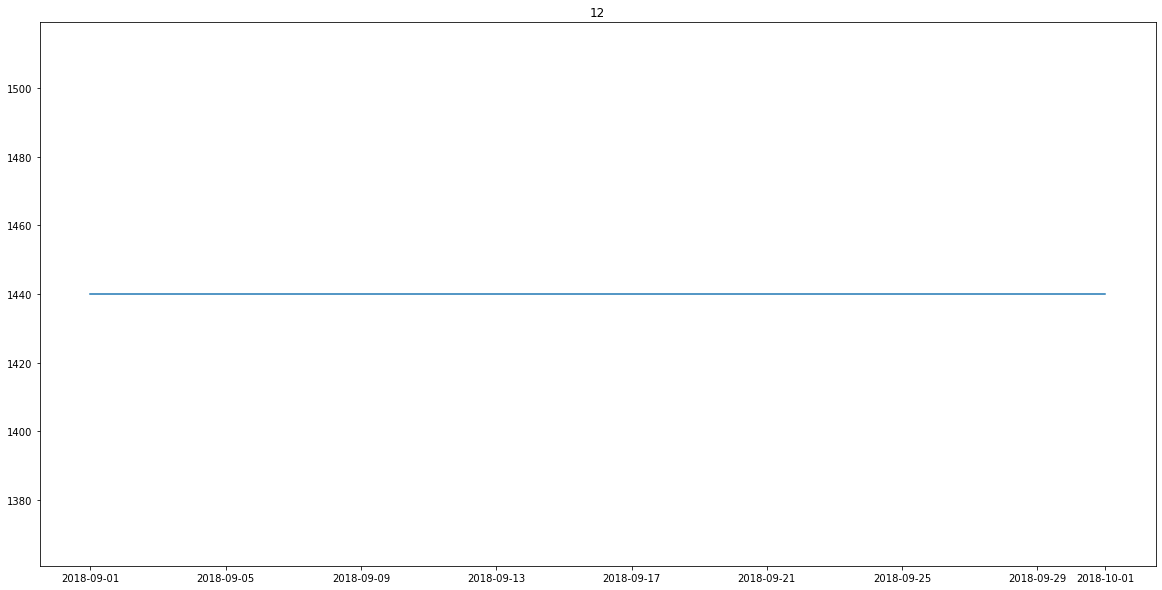

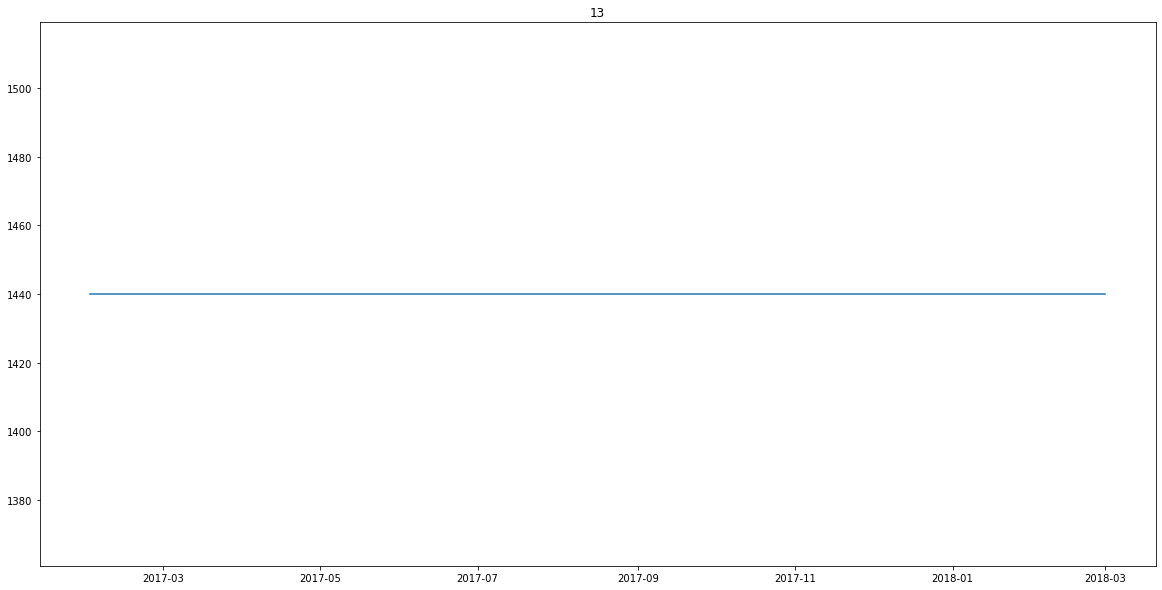

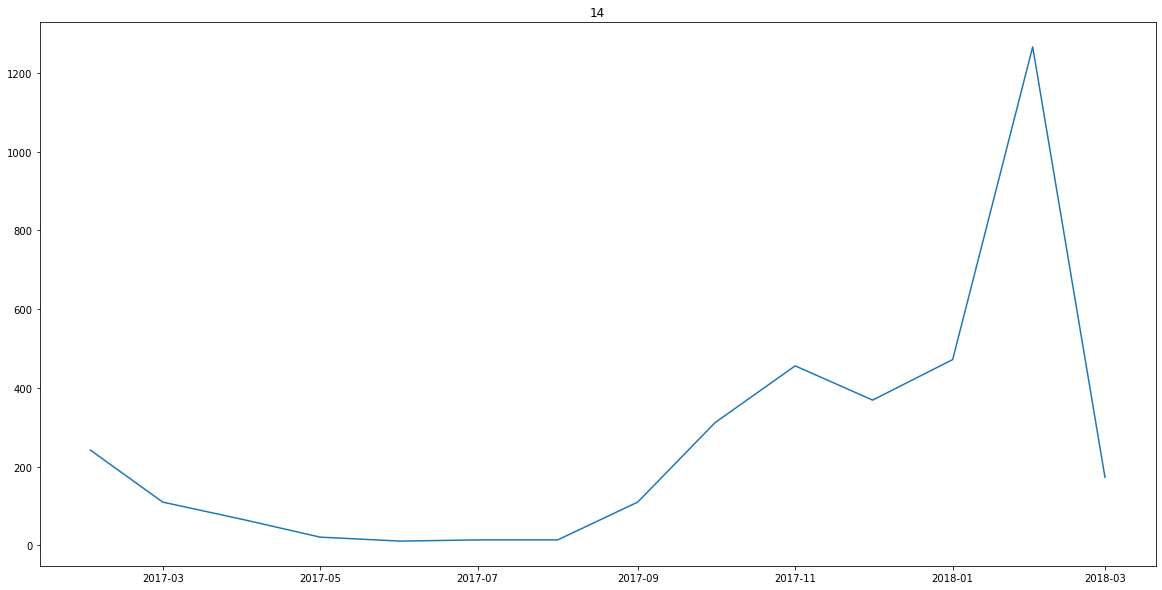

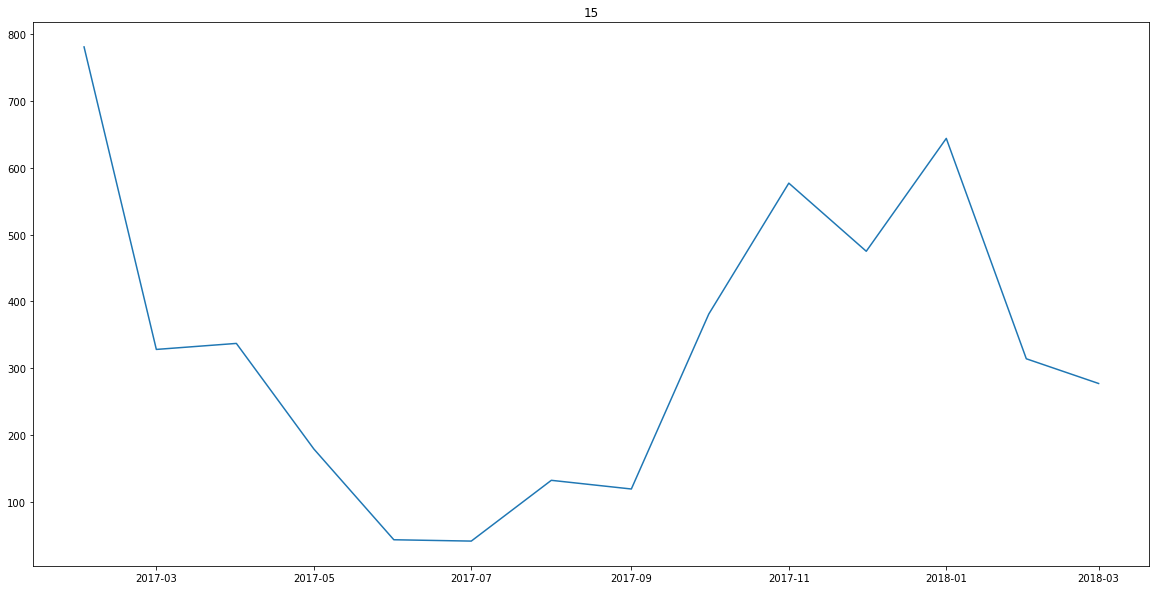

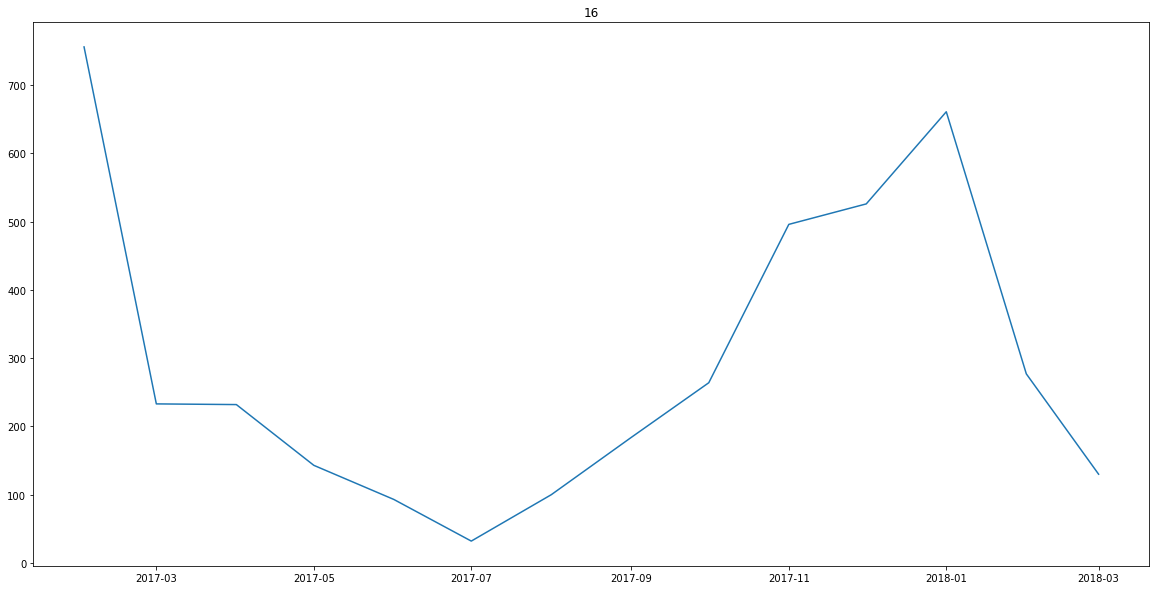

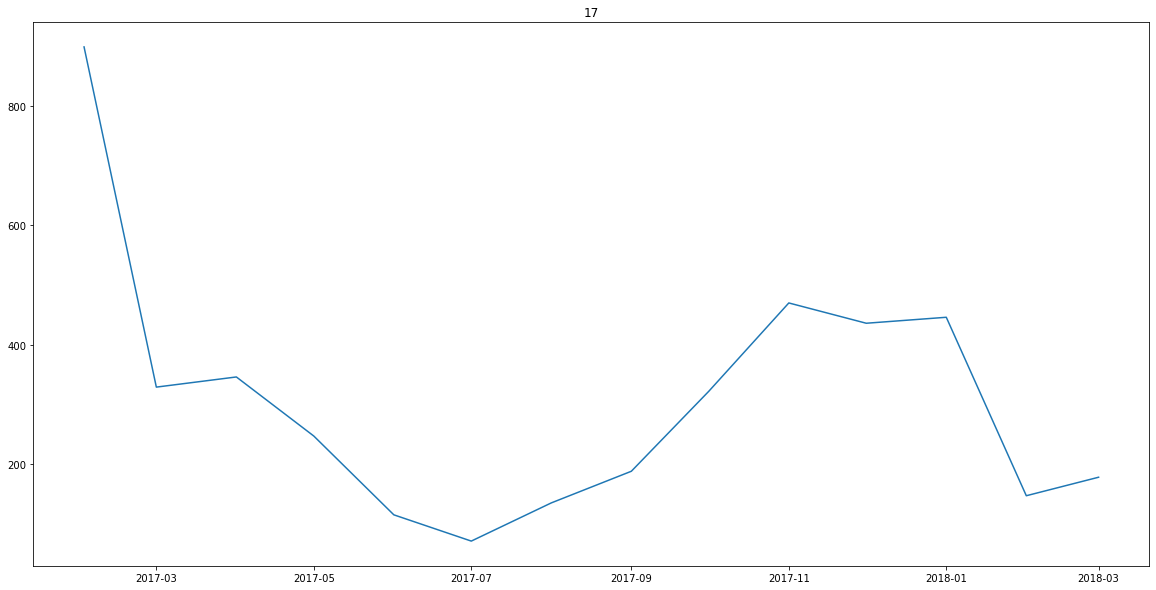

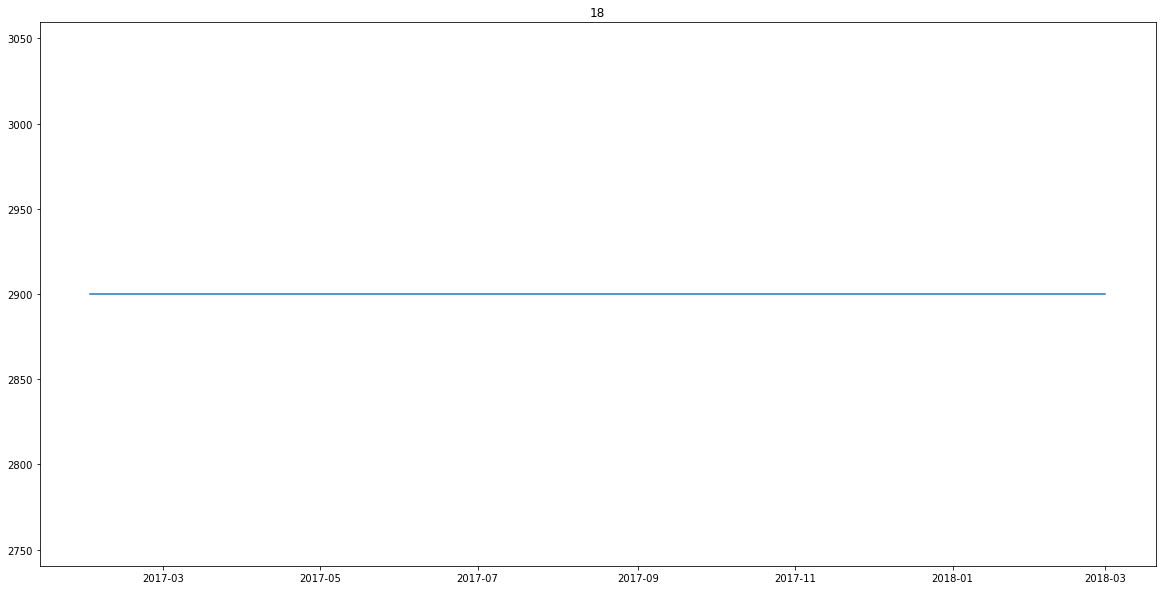

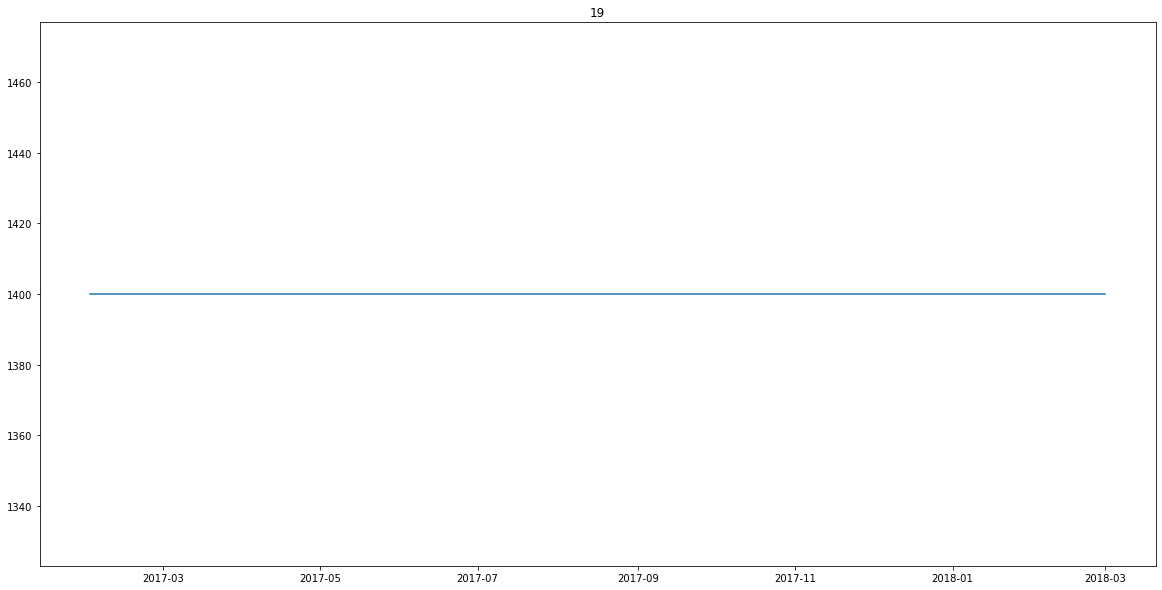

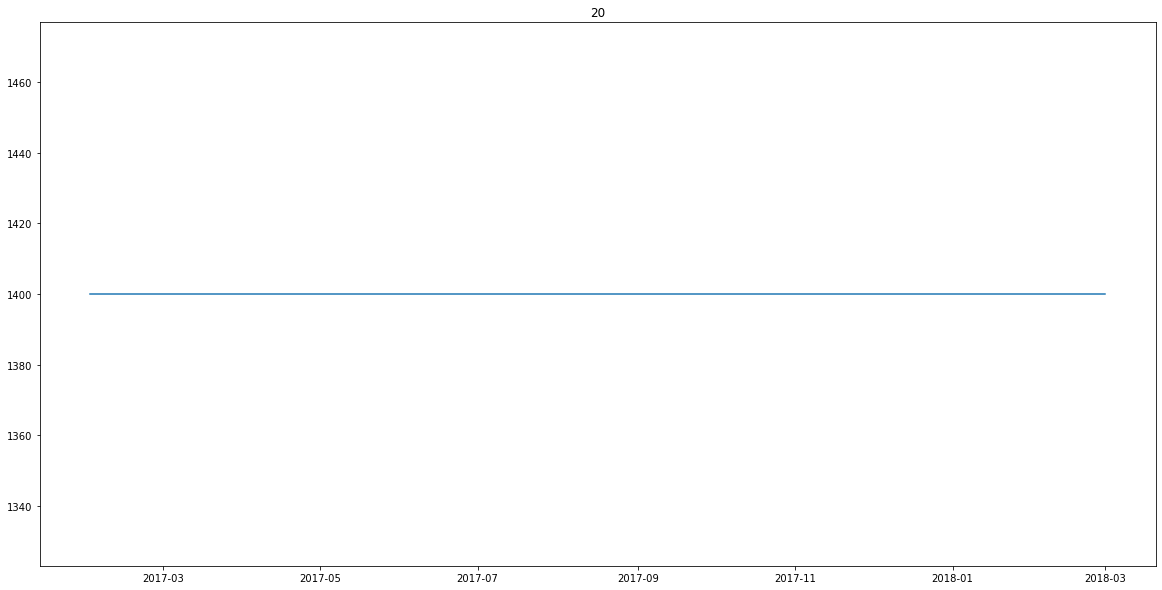

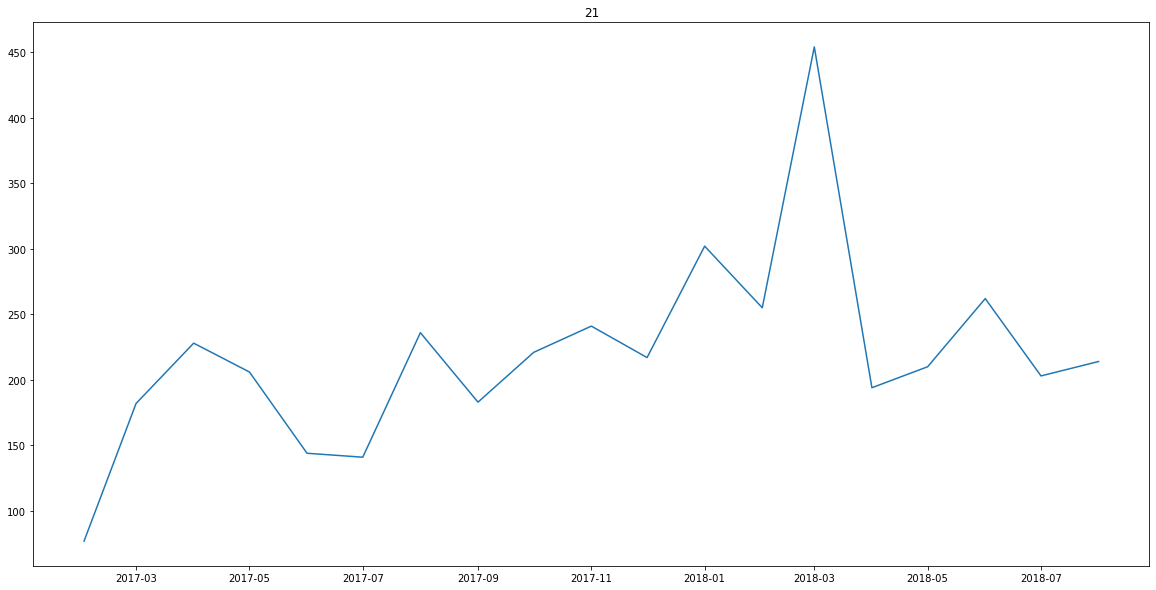

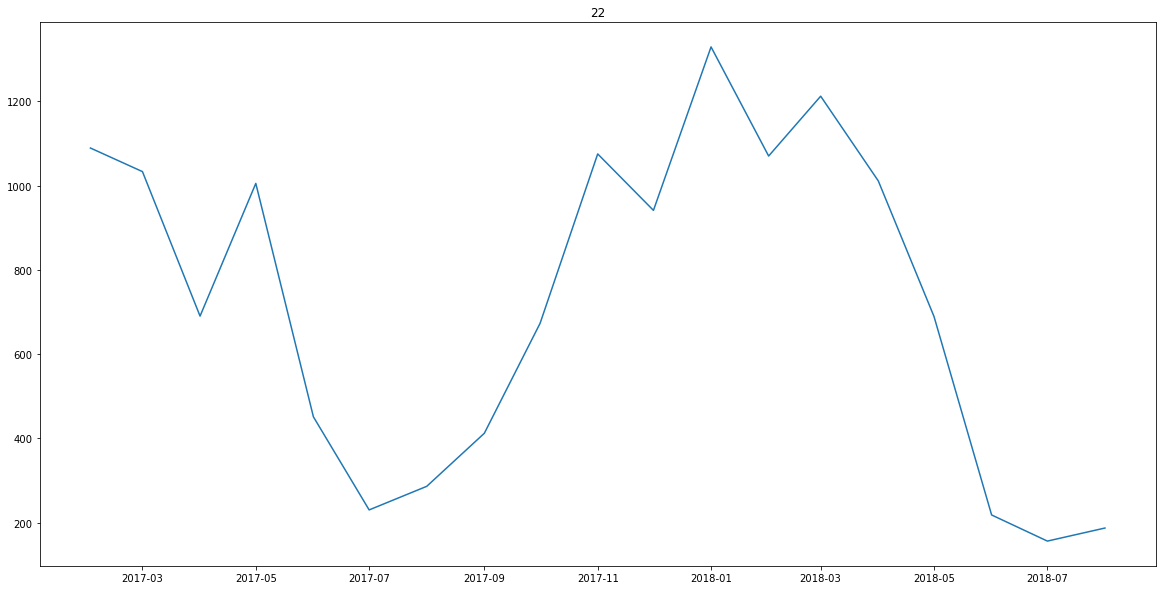

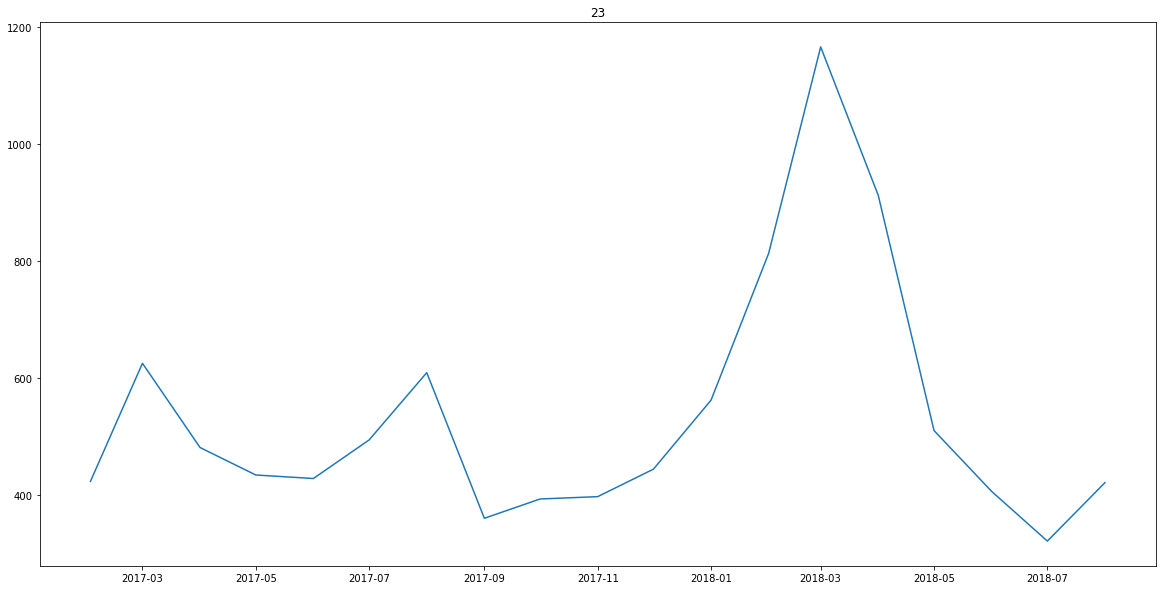

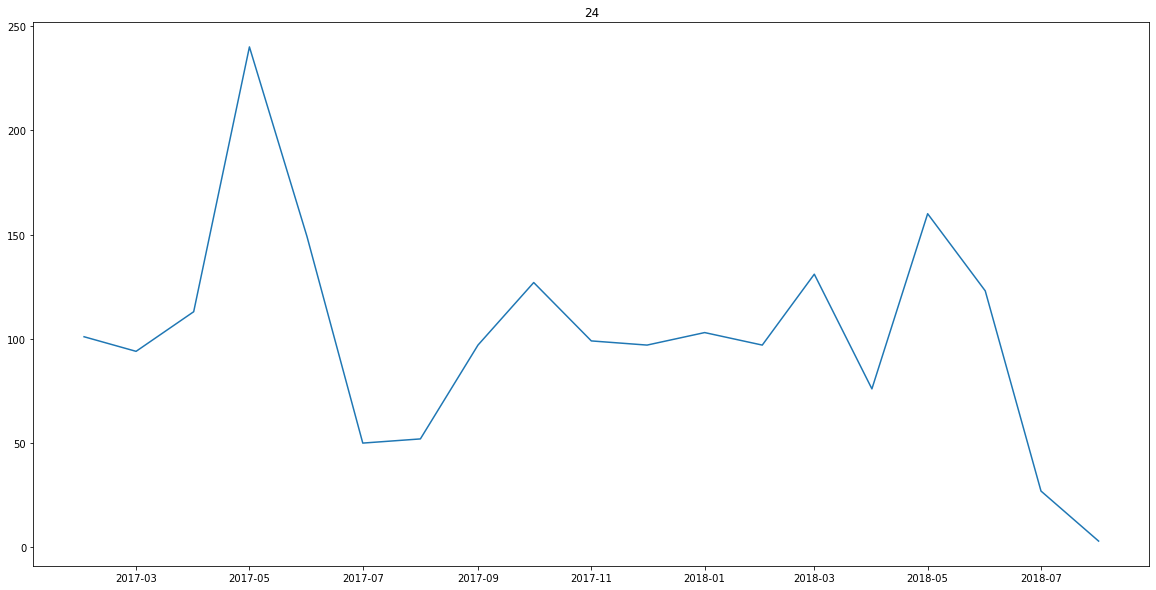

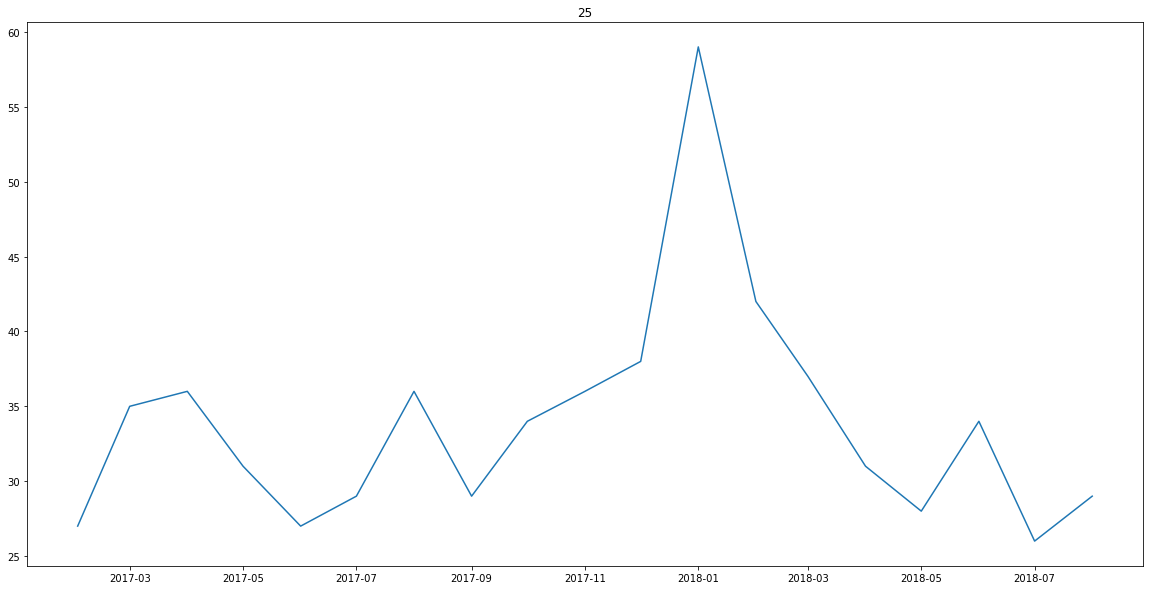

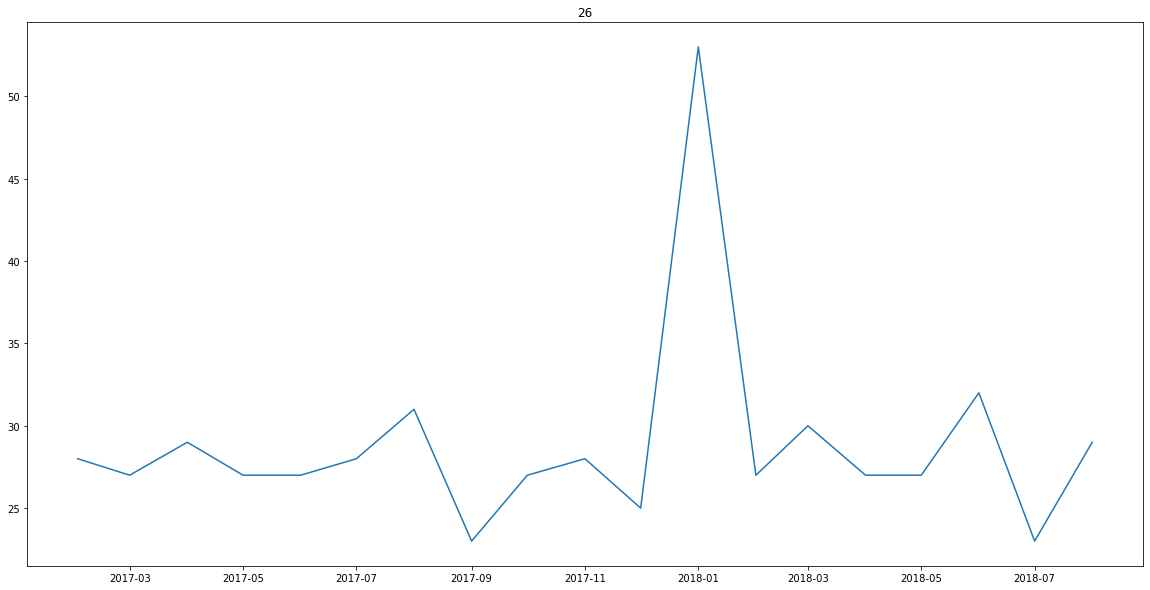

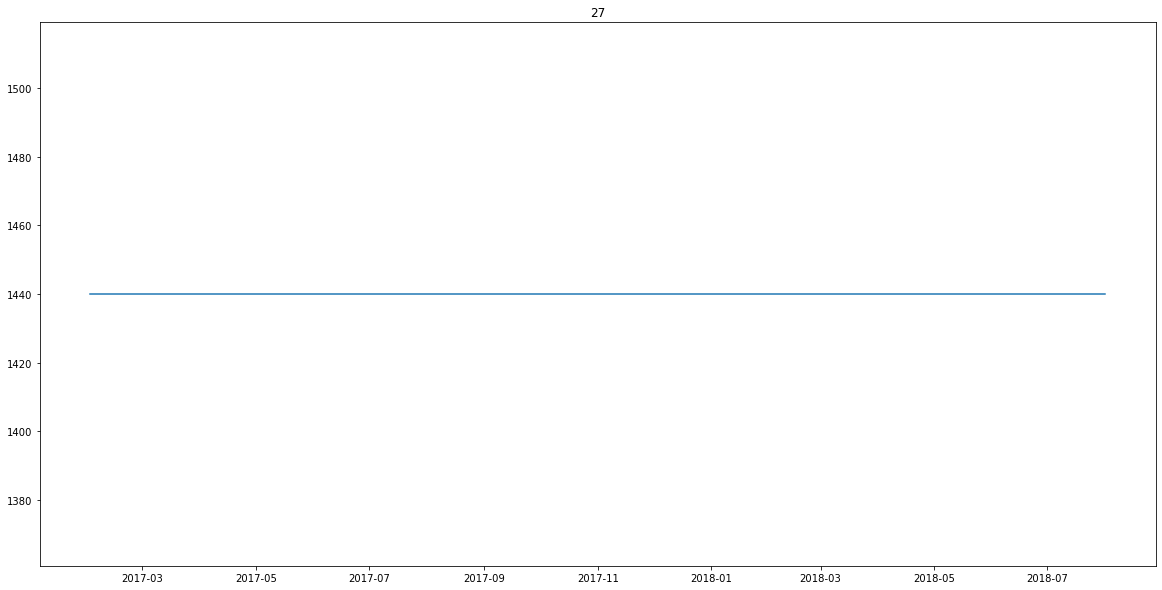

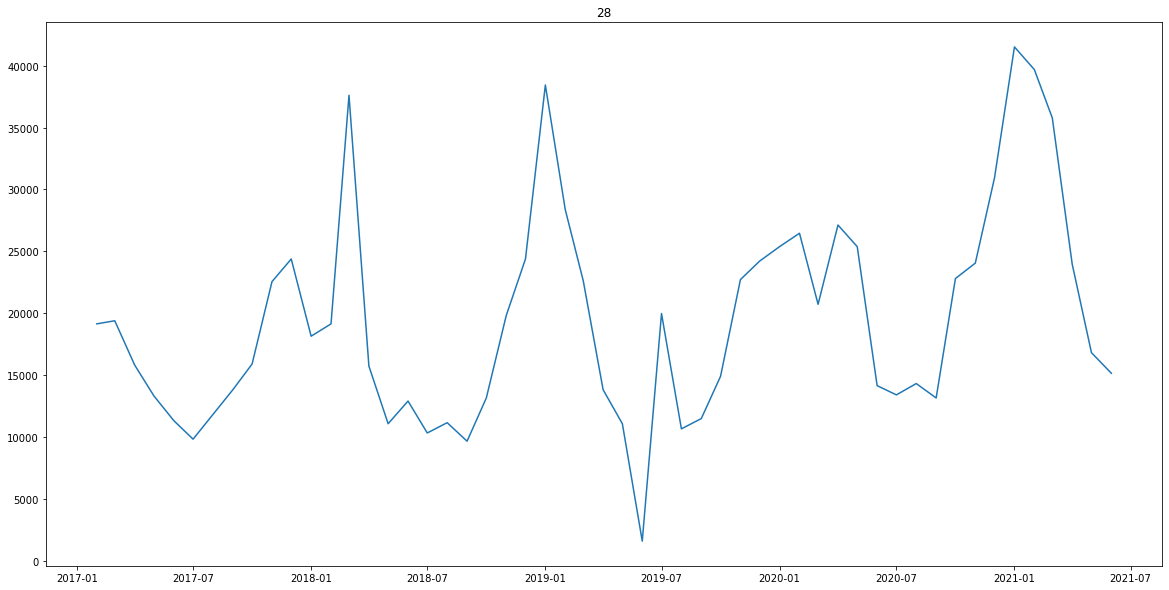

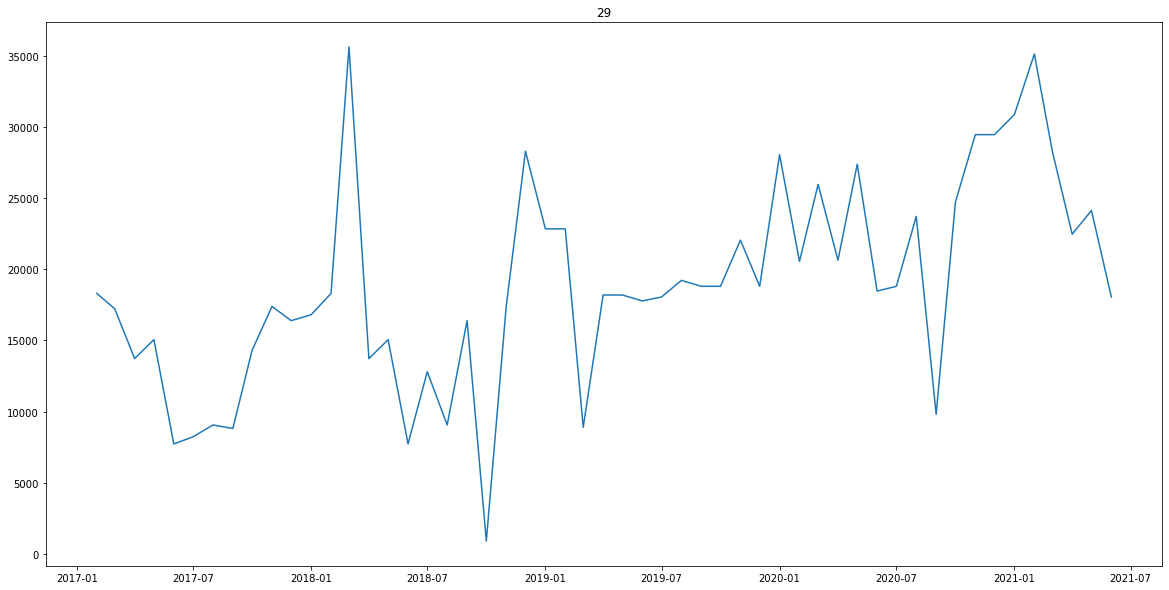

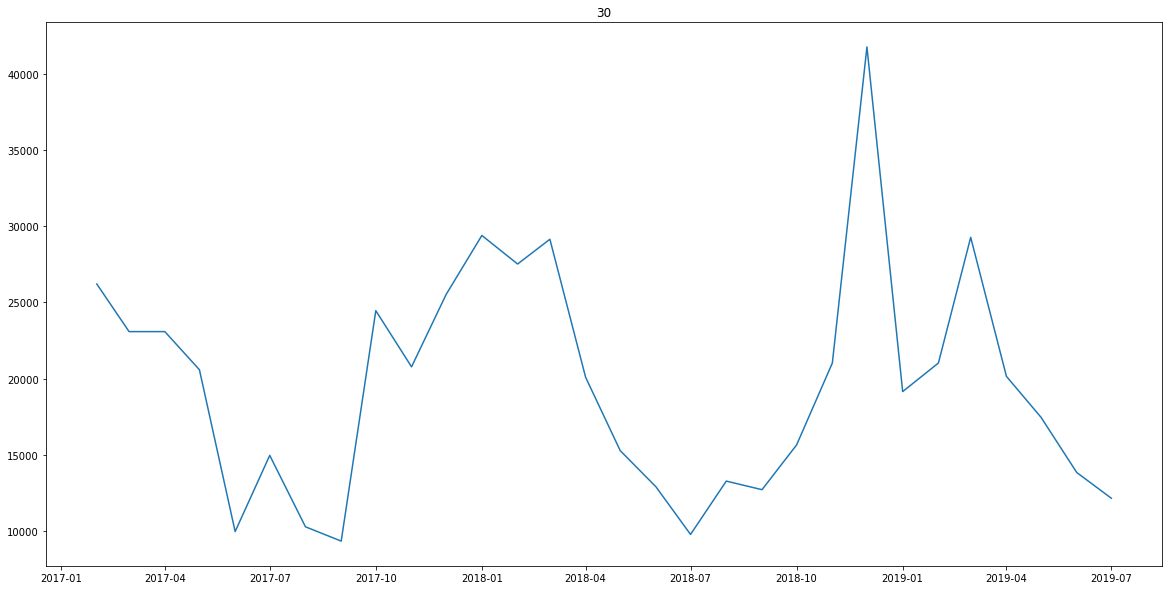

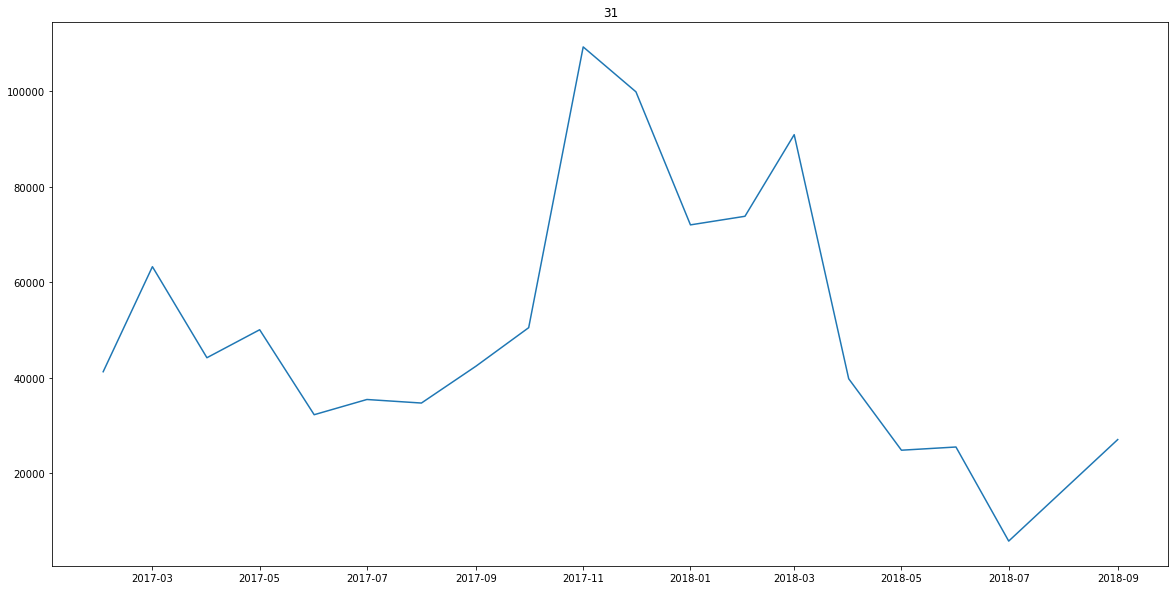

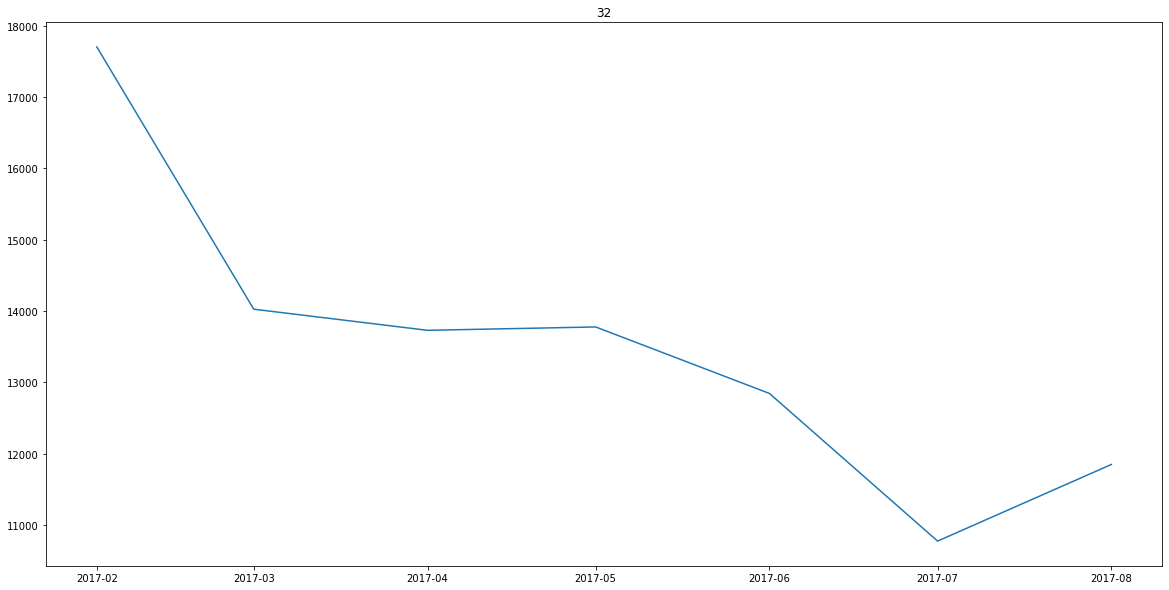

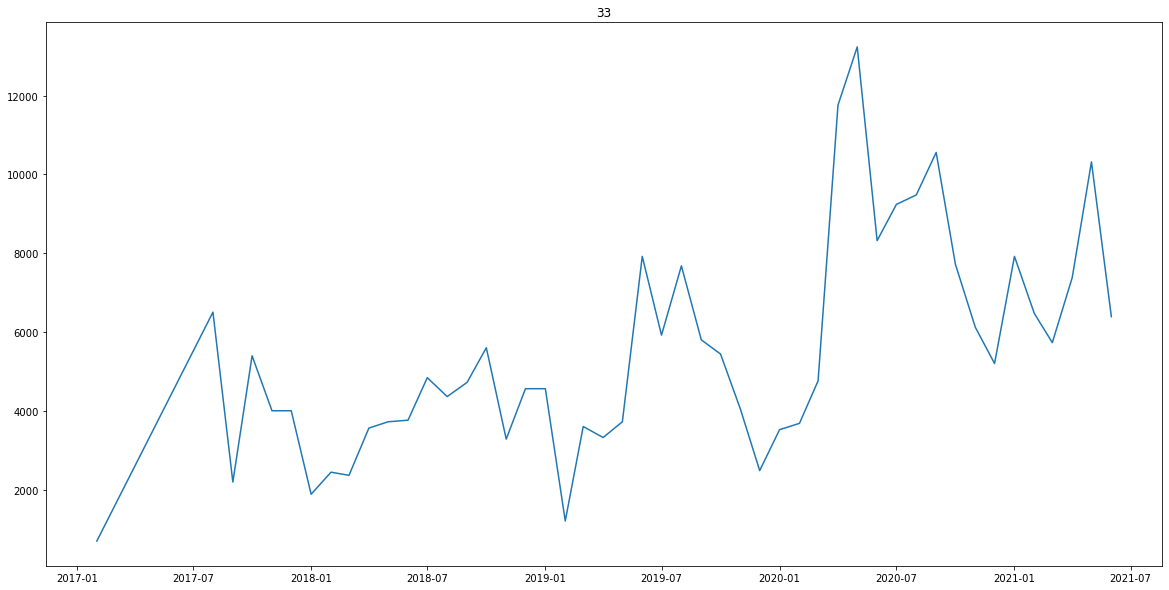

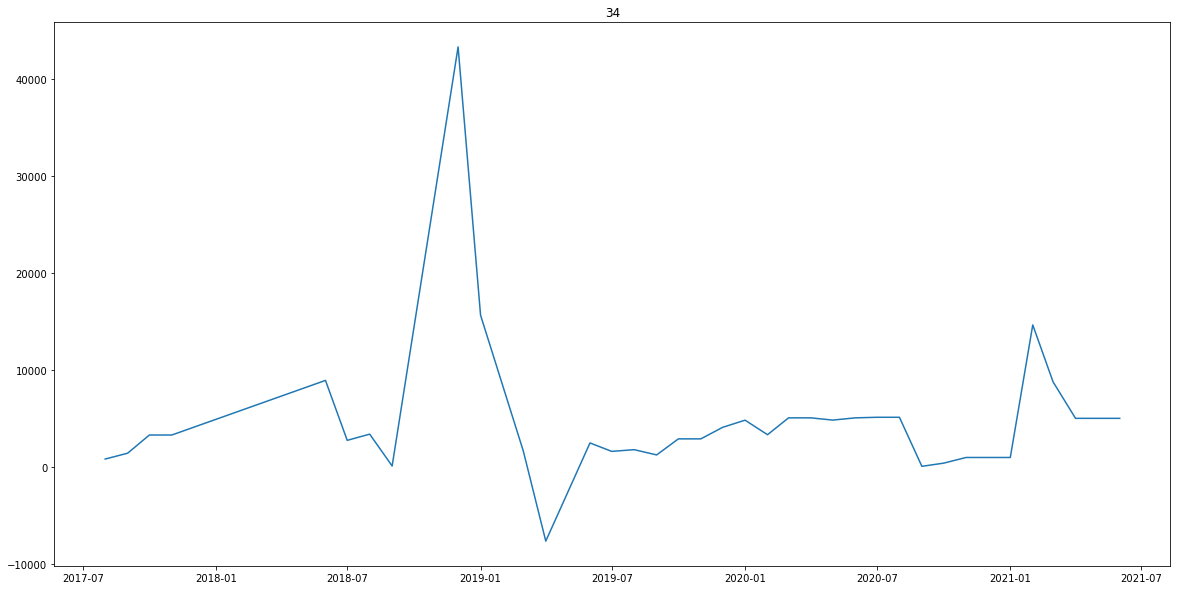

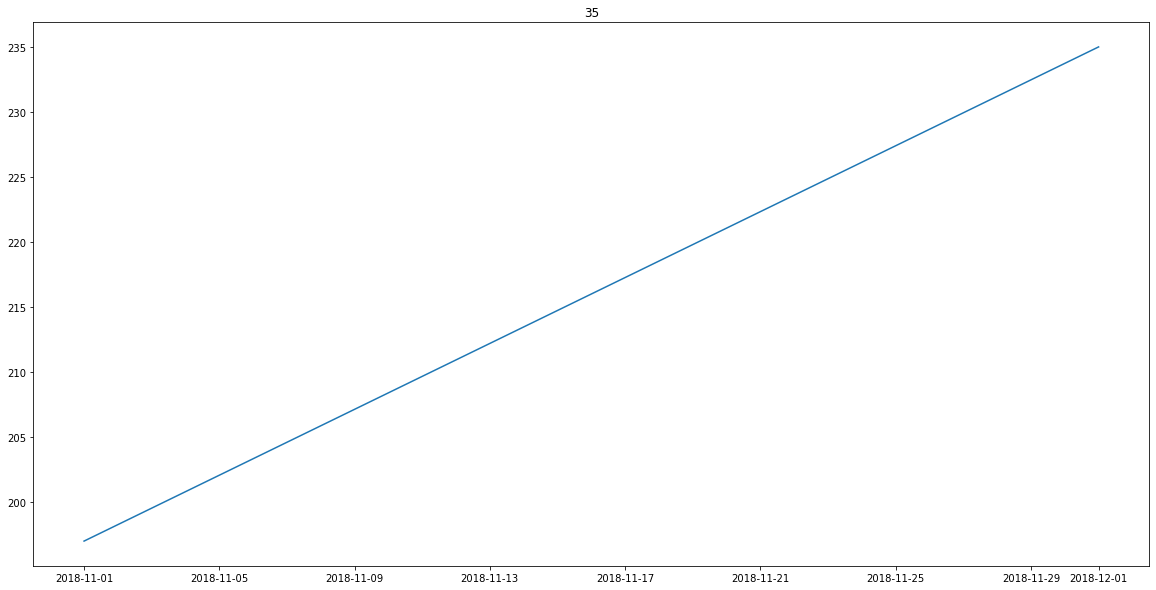

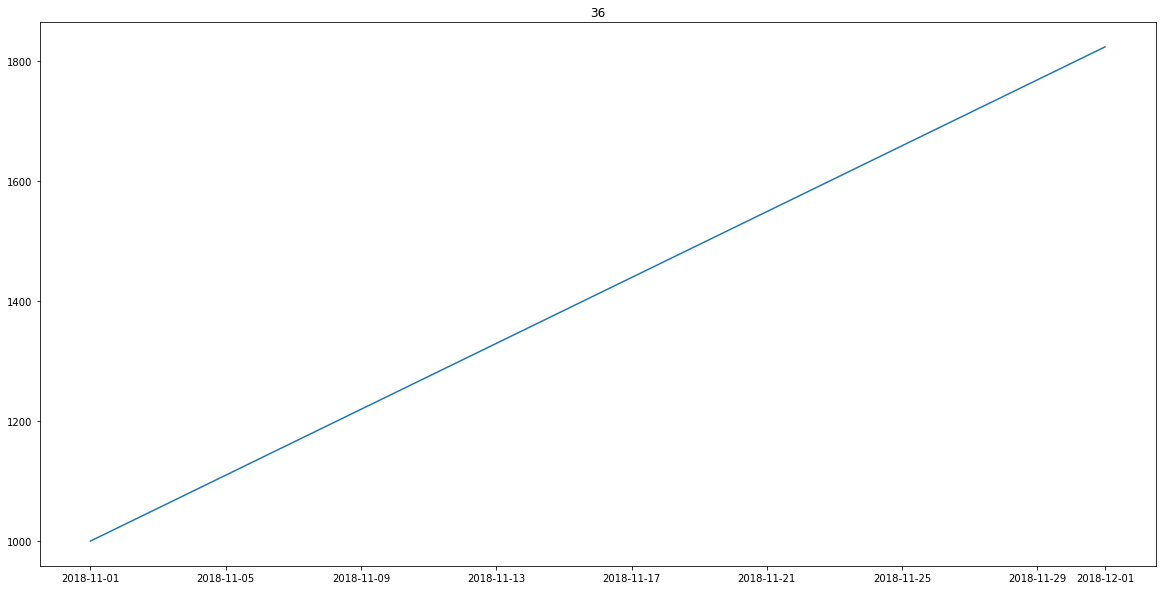

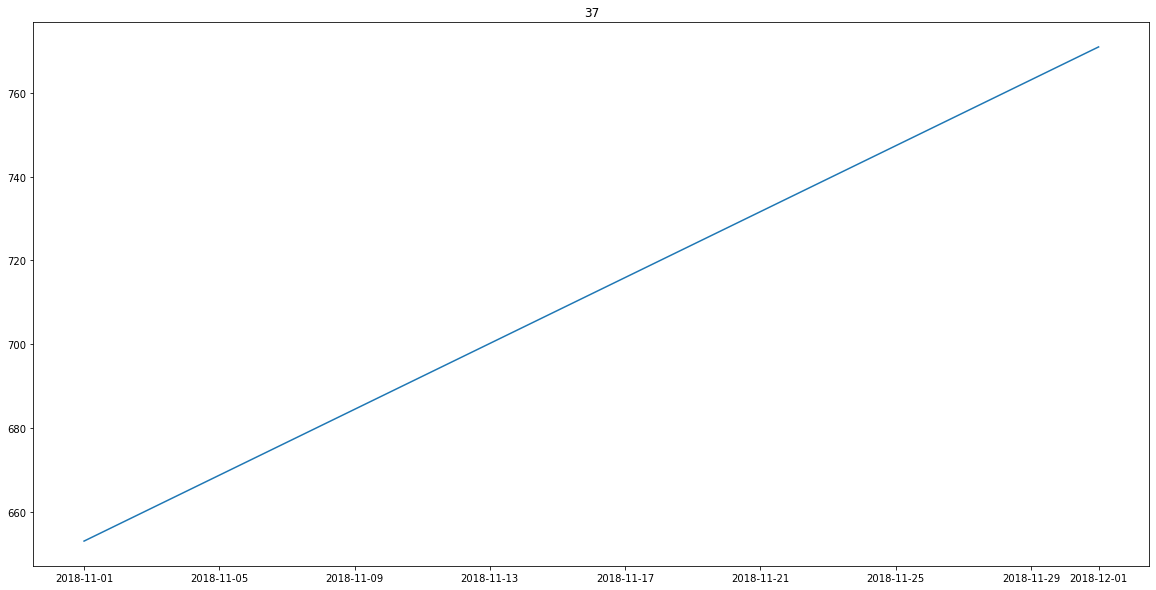

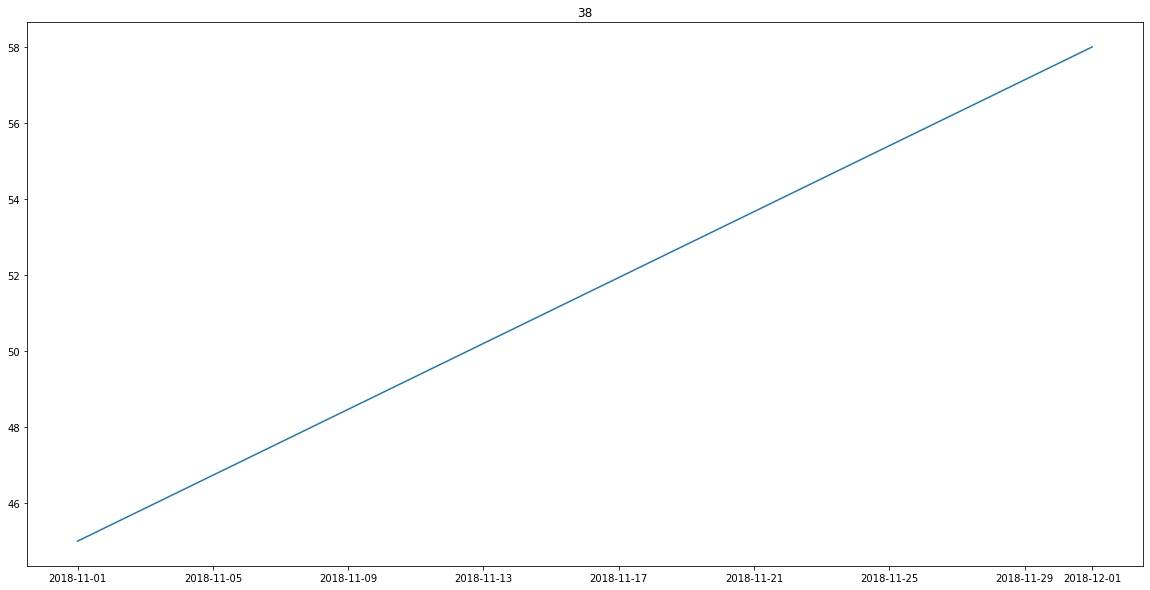

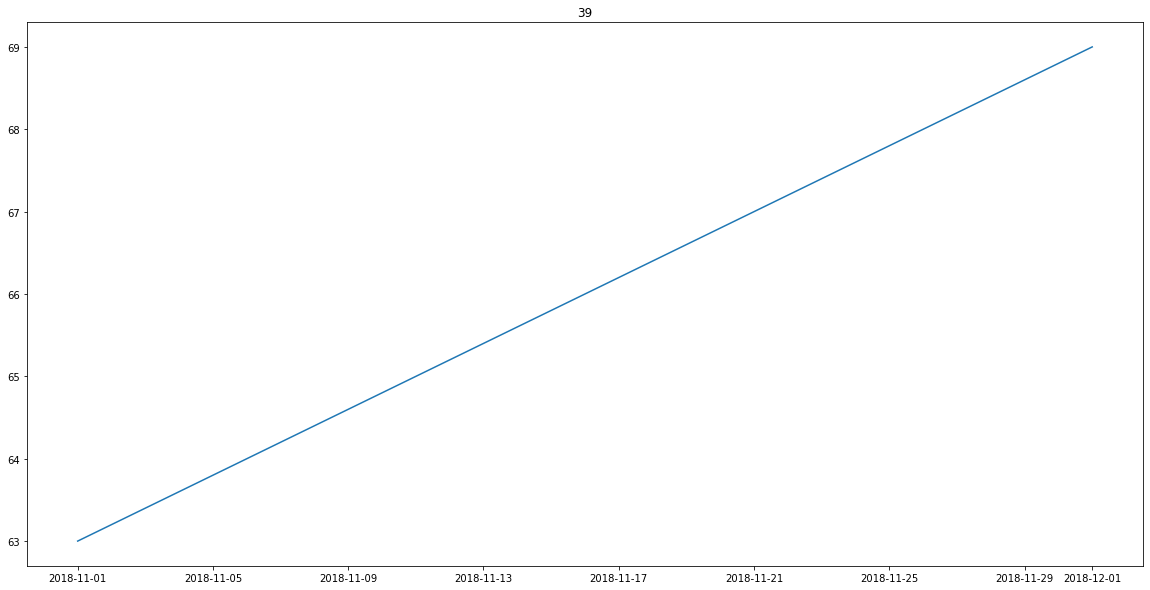

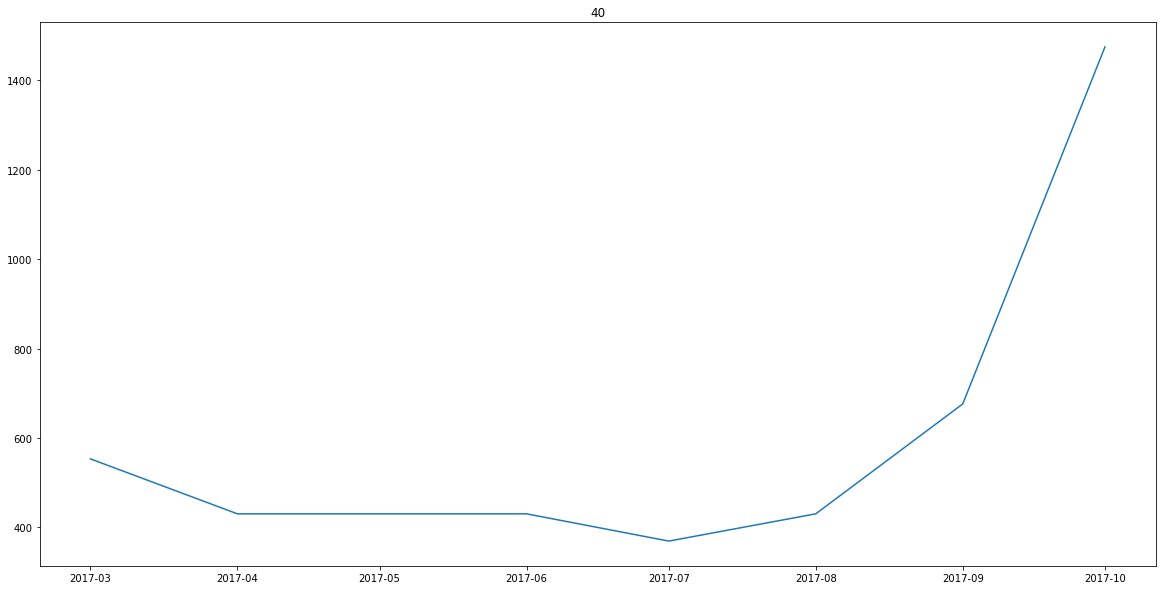

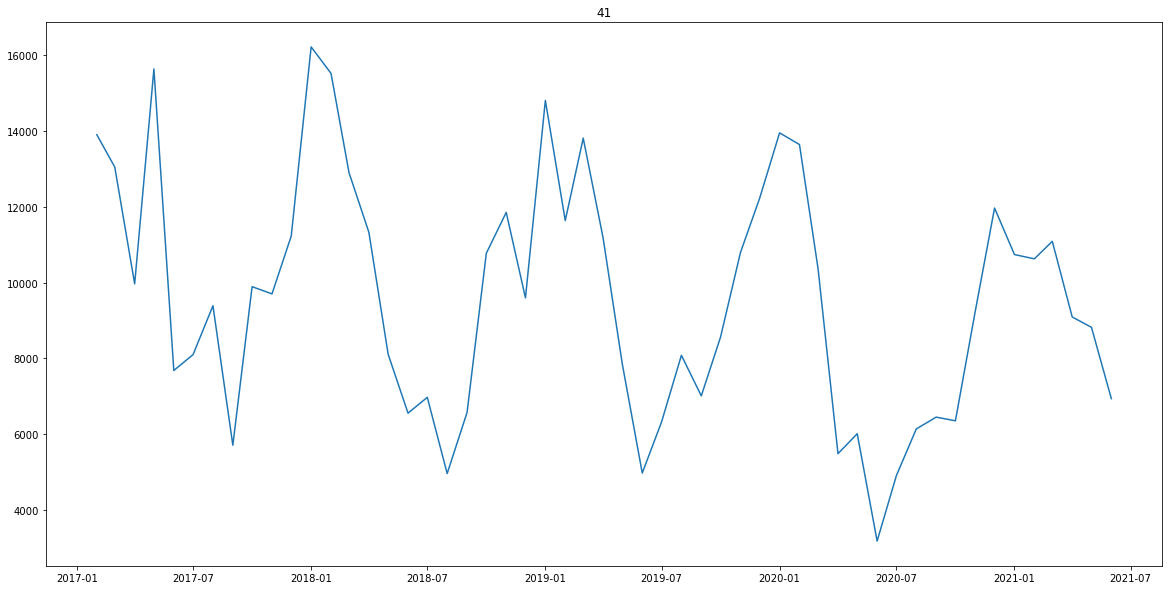

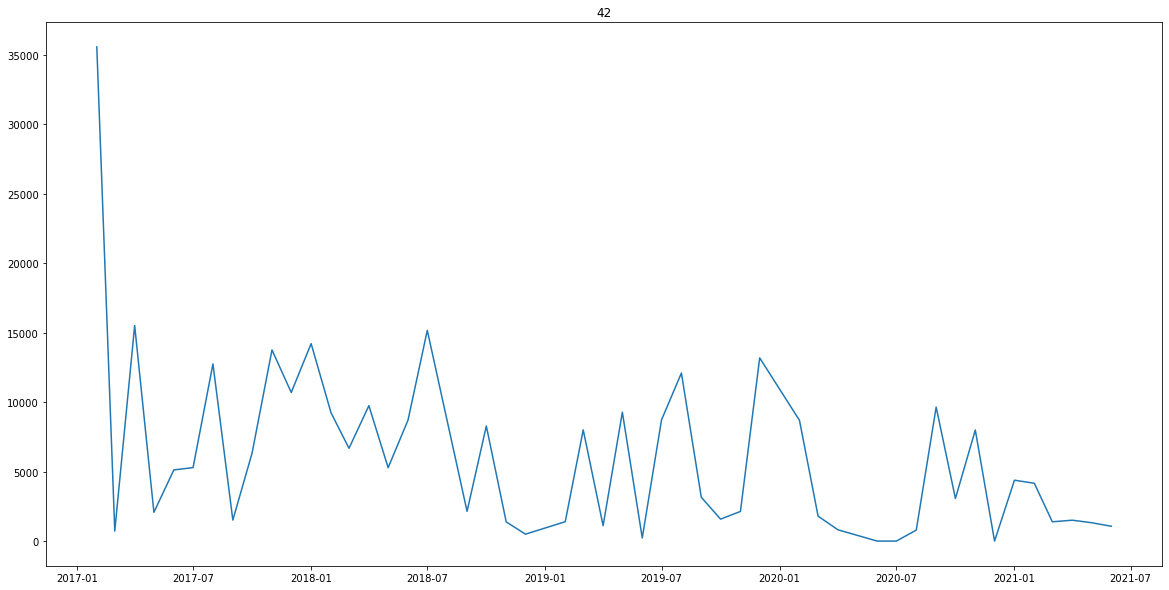

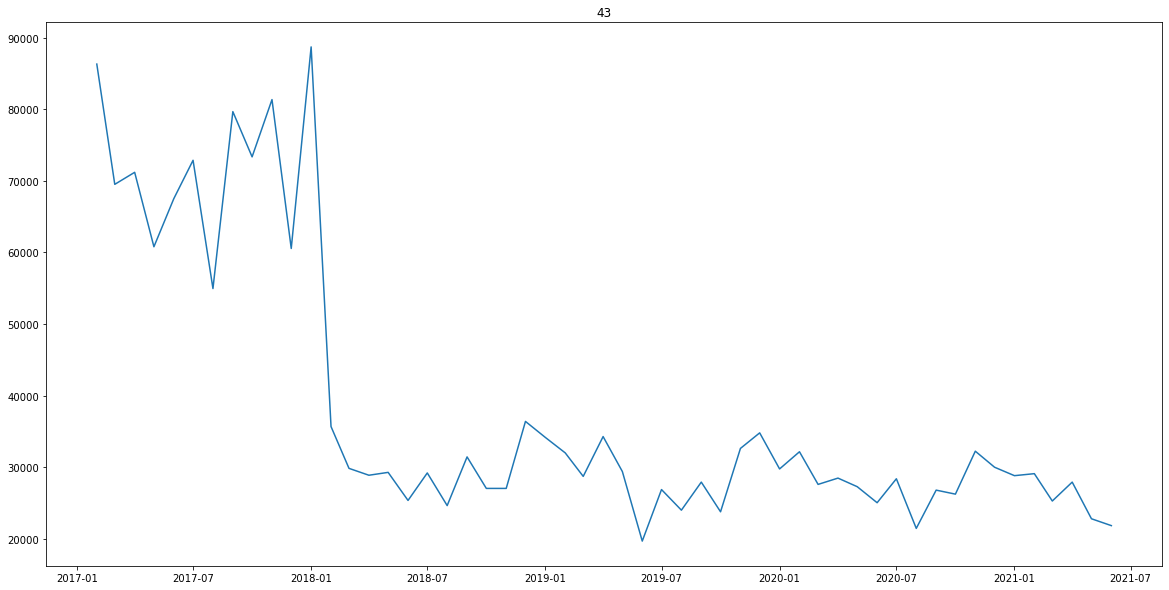

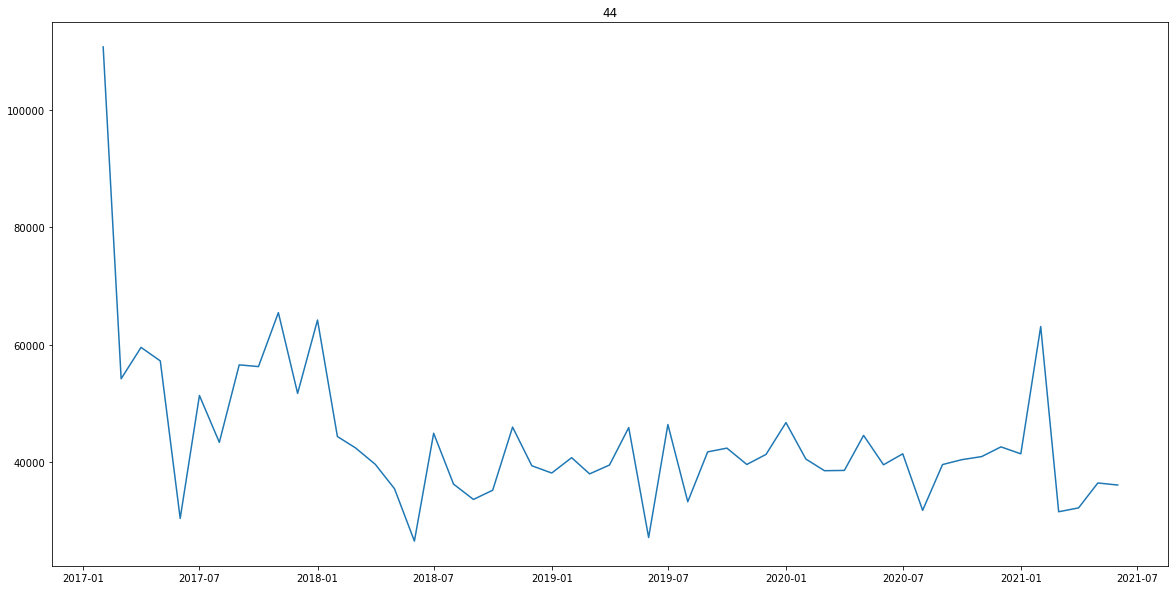

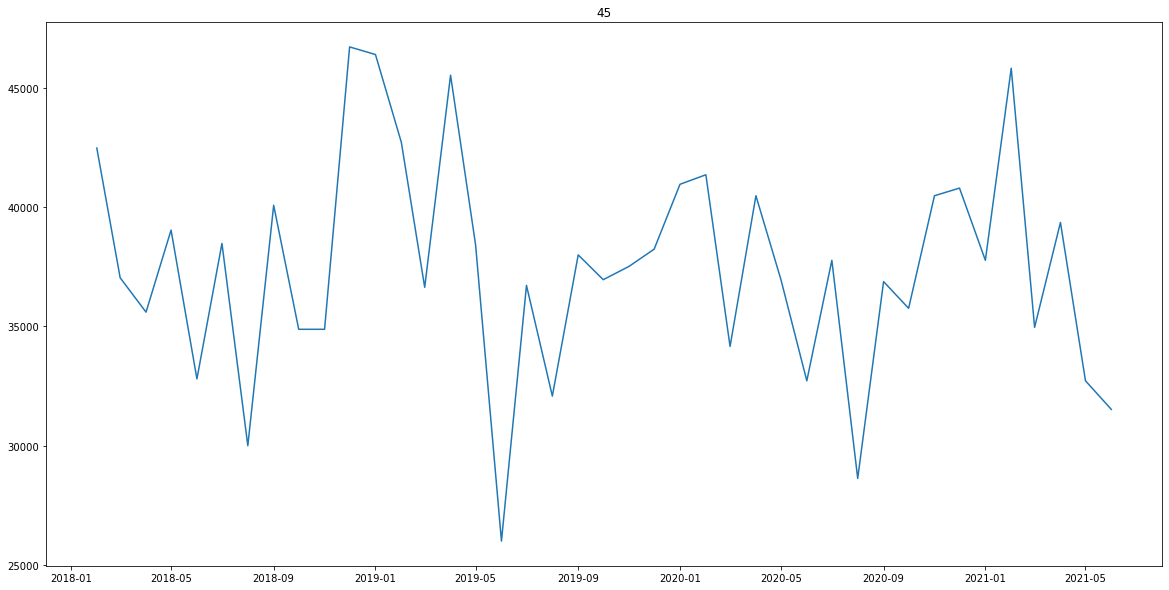

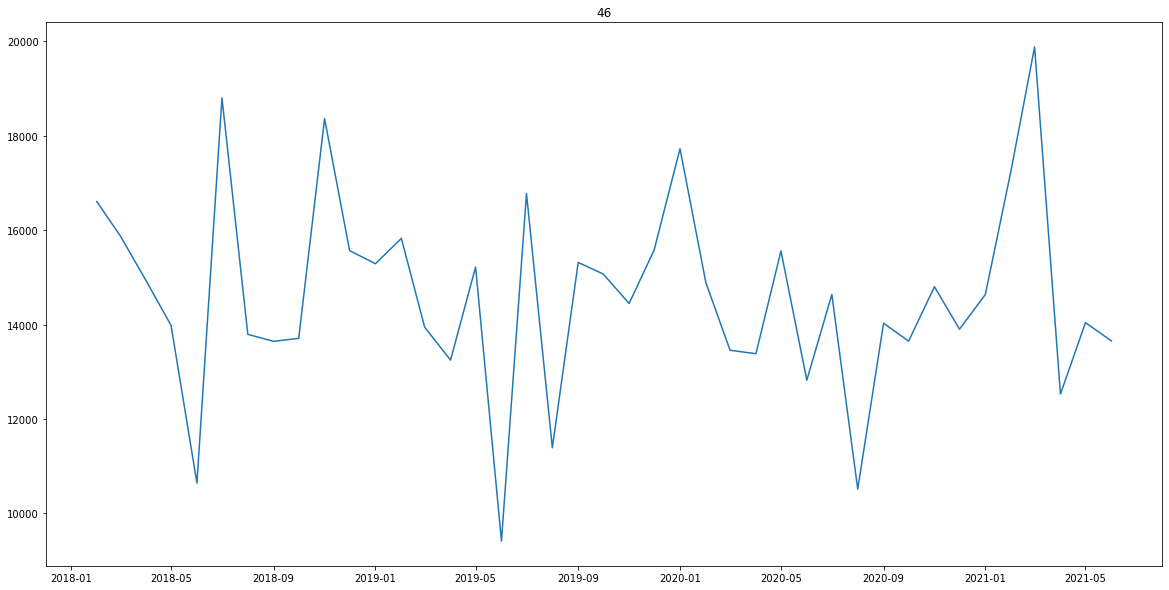

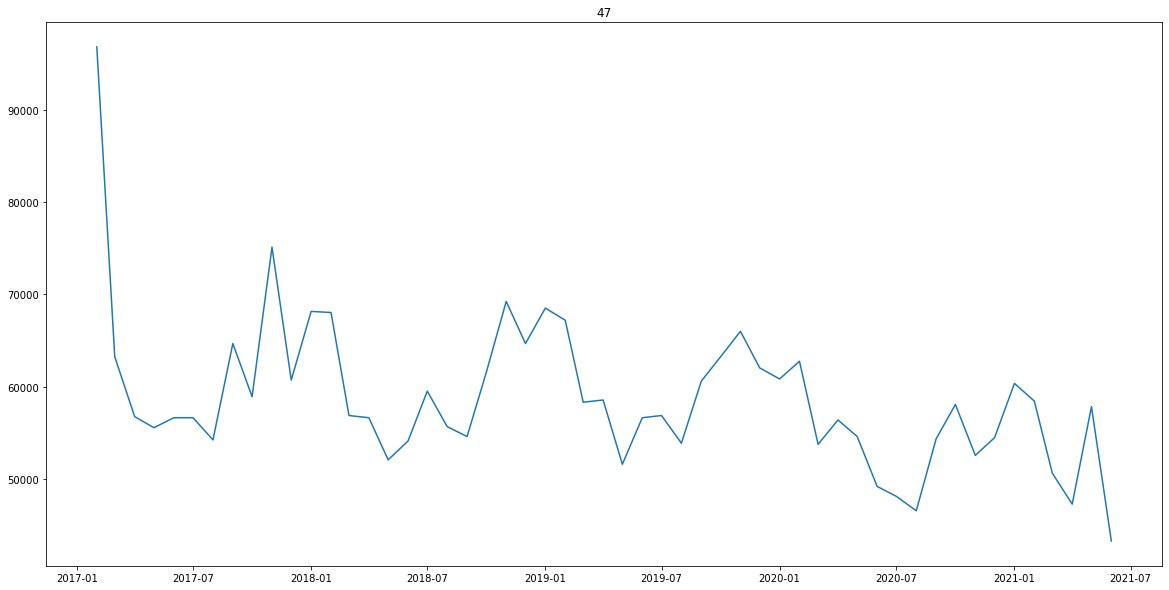

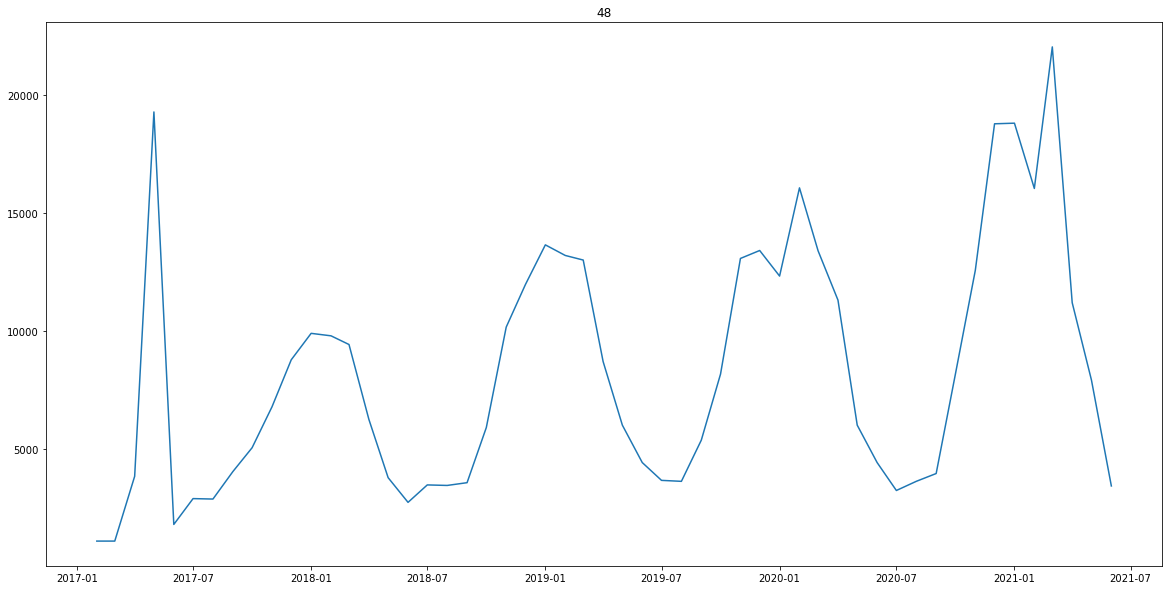

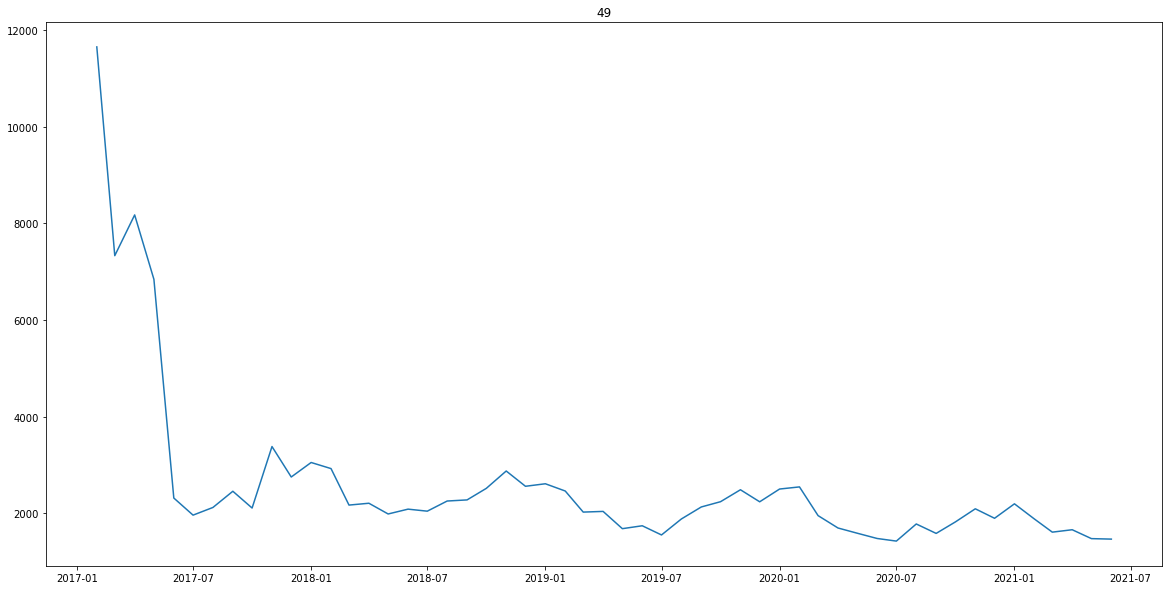

In [5]:
for i in range(len(unq_id)):
    DATA = df[df['object_id'] == unq_id[i]]
    plt.figure(figsize=(20, 10))
    plt.title(i)
    plt.plot(DATA.datetime, DATA.value)
    plt.plot()
    plt.show()

### временной ряд ближе к стационарному (сезонность\тренд отсутствуют)

In [8]:
df_group = df.groupby(by=["object_id"]).size().reset_index(name='count').sort_values(by = 'count')
df_group = df_group[df_group['count'] == 53]
df_group

,object_id,count
2614,780200000355830001,53
3047,780200000448020003,53
3054,780200000448030012,53
3138,780200000456880001,53
3139,780200000456930001,53
...,...,...
1855,780200000340140050,53
1856,780200000340140051,53
1857,780200000340140052,53
1844,780200000340140038,53


In [9]:
unq_id = df_group['object_id'].unique()
unq_id

array([780200000355830001, 780200000448020003, 780200000448030012, ...,
       780200000340140052, 780200000340140038, 780200000340430001],
      dtype=int64)

In [10]:
df_adf = pd.DataFrame(columns = ['adf_test', 'p_value', '1%', '5%', '10%', 'output'])
for i in range(len(unq_id)):
    df_new = df[df['object_id'] == unq_id[i]]
    Y = df_new['value'].values # Выделим целевой признак 
    result = adfuller(Y)
    
    df_adf.at[i, 'adf_test'] = result[0]
    df_adf.at[i, 'p_value'] = result[1]
    df_adf.at[i, '1%'] = list(result[4].values())[0]
    df_adf.at[i, '5%'] = list(result[4].values())[1]
    df_adf.at[i, '10%'] = list(result[4].values())[2]
    if result[0]> result[4]['5%']: 
        df_adf.at[i, 'output'] = 'ряд не стационарен'
    else:
        df_adf.at[i, 'output'] = 'ряд стационарен'
    
df_adf

C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs

,adf_test,p_value,1%,5%,10%,output
0,-5.094797,0.000014,-3.562879,-2.918973,-2.597393,ряд стационарен
1,-1.201619,0.672899,-3.571472,-2.922629,-2.599336,ряд не стационарен
2,-1.610588,0.477667,-3.565624,-2.920142,-2.598015,ряд не стационарен
3,-4.339711,0.000379,-3.584829,-2.928299,-2.602344,ряд стационарен
4,-5.786807,0.0,-3.577848,-2.925338,-2.600774,ряд стационарен
...,...,...,...,...,...,...
2927,-3.002184,0.034691,-3.571472,-2.922629,-2.599336,ряд стационарен
2928,3.544138,1.0,-3.600983,-2.935135,-2.605963,ряд не стационарен
2929,-1.573061,0.49711,-3.577848,-2.925338,-2.600774,ряд не стационарен
2930,-1.59825,0.484473,-3.568486,-2.92136,-2.598662,ряд не стационарен


In [11]:
df_adf[df_adf['output'] == 'ряд стационарен'].sort_values(by = 'p_value')

,adf_test,p_value,1%,5%,10%,output
2159,-60.970629,0.0,-3.600983,-2.935135,-2.605963,ряд стационарен
2786,-20.334034,0.0,-3.592504,-2.93155,-2.604066,ряд стационарен
225,-16.917789,0.0,-3.562879,-2.918973,-2.597393,ряд стационарен
2721,-14.90201,0.0,-3.568486,-2.92136,-2.598662,ряд стационарен
2846,-14.379489,0.0,-3.565624,-2.920142,-2.598015,ряд стационарен
...,...,...,...,...,...,...
1536,-2.927493,0.042243,-3.571472,-2.922629,-2.599336,ряд стационарен
130,-2.927298,0.042264,-3.562879,-2.918973,-2.597393,ряд стационарен
1386,-2.926869,0.042312,-3.562879,-2.918973,-2.597393,ряд стационарен
804,-2.922348,0.04281,-3.565624,-2.920142,-2.598015,ряд стационарен


In [12]:
df_adf[df_adf['output'] == 'ряд не стационарен'].sort_values(by = 'p_value')

,adf_test,p_value,1%,5%,10%,output
1888,-2.91961,0.043115,-3.571472,-2.922629,-2.599336,ряд не стационарен
2062,-2.919456,0.043132,-3.596636,-2.933297,-2.604991,ряд не стационарен
691,-2.918597,0.043228,-3.584829,-2.928299,-2.602344,ряд не стационарен
592,-2.918421,0.043247,-3.565624,-2.920142,-2.598015,ряд не стационарен
2255,-2.917267,0.043377,-3.568486,-2.92136,-2.598662,ряд не стационарен
...,...,...,...,...,...,...
799,2.224729,0.998902,-3.592504,-2.93155,-2.604066,ряд не стационарен
1113,2.808118,1.0,-3.600983,-2.935135,-2.605963,ряд не стационарен
810,2.901448,1.0,-3.596636,-2.933297,-2.604991,ряд не стационарен
2928,3.544138,1.0,-3.600983,-2.935135,-2.605963,ряд не стационарен
